C:\Users\maria\AppData\Local\Temp\ipykernel_20012\2174046971.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.fillna(data1.mean(), inplace=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_20012\2174046971.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.fillna(data2.mean(), inplace=True)


Determinazione del valore ottimale di K per Dataset 1


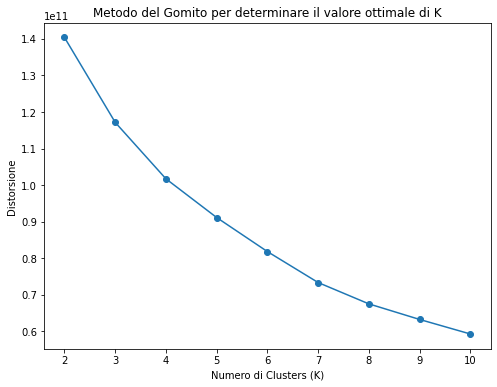

Determinazione del valore ottimale di K per Dataset 2


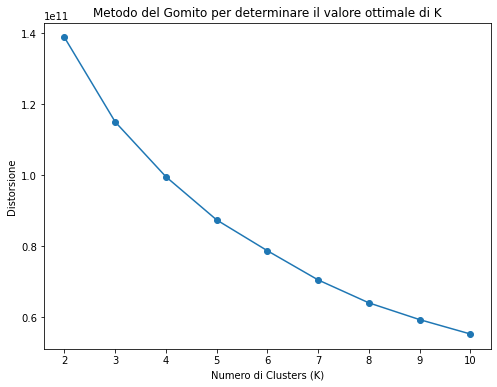


Esecuzione KMeans++ per Dataset 1:
Run 1/15 completata. Tempo: 0.47 secondi. Silhouette Score: 0.5132
Run 2/15 completata. Tempo: 0.47 secondi. Silhouette Score: 0.5132
Run 3/15 completata. Tempo: 0.50 secondi. Silhouette Score: 0.5132
Run 4/15 completata. Tempo: 0.52 secondi. Silhouette Score: 0.5132
Run 5/15 completata. Tempo: 0.51 secondi. Silhouette Score: 0.5121
Run 6/15 completata. Tempo: 0.58 secondi. Silhouette Score: 0.5132
Run 7/15 completata. Tempo: 0.47 secondi. Silhouette Score: 0.5132
Run 8/15 completata. Tempo: 0.52 secondi. Silhouette Score: 0.5132
Run 9/15 completata. Tempo: 0.49 secondi. Silhouette Score: 0.5132
Run 10/15 completata. Tempo: 0.47 secondi. Silhouette Score: 0.5132
Run 11/15 completata. Tempo: 0.48 secondi. Silhouette Score: 0.5111
Run 12/15 completata. Tempo: 0.45 secondi. Silhouette Score: 0.5132
Run 13/15 completata. Tempo: 0.45 secondi. Silhouette Score: 0.5132
Run 14/15 completata. Tempo: 0.47 secondi. Silhouette Score: 0.5132
Run 15/15 completata.

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time
import random

# Caricare i dati dal file CSV
file_path = r'C:/Users/maria/Desktop/Customer_Data.csv'   # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path)

# Funzione per dividere il dataset in due parti casualmente
def split_data_randomly(data):
    # Shuffliamo i dati
    shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    # Dividiamo i dati in due set
    mid_point = len(shuffled_data) // 2
    dataset_1 = shuffled_data.iloc[:mid_point, :]
    dataset_2 = shuffled_data.iloc[mid_point:, :]
    return dataset_1, dataset_2

# Funzione per determinare il valore ottimale di K usando il metodo "Elbow"
def find_optimal_k(data, max_k=10):
    distortions = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k+1), distortions, marker='o')
    plt.xlabel('Numero di Clusters (K)')
    plt.ylabel('Distorsione')
    plt.title('Metodo del Gomito per determinare il valore ottimale di K')
    plt.show()

# Funzione per eseguire KMeans++ con logging e calcolo del tempo di esecuzione
def perform_kmeans(data, k, n_runs=15):
    best_score = -1
    best_kmeans = None
    for run in range(n_runs):
        start_time = time.time()
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=random.randint(0, 1000))
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        end_time = time.time()
        print(f"Run {run+1}/{n_runs} completata. Tempo: {end_time - start_time:.2f} secondi. Silhouette Score: {score:.4f}")
        if score > best_score:
            best_score = score
            best_kmeans = kmeans
    print(f"Il migliore Silhouette Score per K={k} è: {best_score:.4f}")
    return best_kmeans

# Dividere i dati
dataset_1, dataset_2 = split_data_randomly(data)

# Seleziona le colonne numeriche per il clustering
numerical_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
                     'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
                     'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
                     'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
                     'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

data1 = dataset_1[numerical_columns]
data2 = dataset_2[numerical_columns]

# Sostituire i valori nulli con la media delle rispettive colonne
data1.fillna(data1.mean(), inplace=True)
data2.fillna(data2.mean(), inplace=True)

# Determinare il valore ottimale di K per entrambi i dataset
print("Determinazione del valore ottimale di K per Dataset 1")
find_optimal_k(data1)

print("Determinazione del valore ottimale di K per Dataset 2")
find_optimal_k(data2)

# Supponiamo che l'utente abbia scelto K = 3 come ottimale per entrambe le divisioni
k_optimal = 2

# Eseguire KMeans++ 15 volte per ciascun dataset
print("\nEsecuzione KMeans++ per Dataset 1:")
best_kmeans_1 = perform_kmeans(data1, k_optimal)

print("\nEsecuzione KMeans++ per Dataset 2:")
best_kmeans_2 = perform_kmeans(data2, k_optimal)

# Salvare i risultati della migliore run
dataset_1['Cluster'] = best_kmeans_1.labels_
dataset_2['Cluster'] = best_kmeans_2.labels_

dataset_1.to_csv('risultato_dataset_1.csv', index=False)
dataset_2.to_csv('risultato_dataset_2.csv', index=False)
print("Risultati salvati in 'risultato_dataset_1.csv' e 'risultato_dataset_2.csv'.")


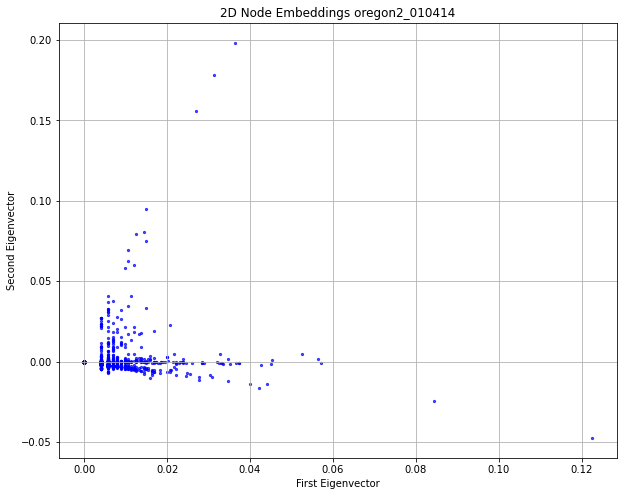

In [45]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

def read_graph(file_path):
    graph = {}
    
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and empty lines
            if line.startswith("#") or not line.strip():
                continue
            
            # Split the line into two node IDs
            from_node, to_node = map(int, line.split())
            
            # Add the edge in both directions since the graph is undirected
            if from_node not in graph:
                graph[from_node] = []
            if to_node not in graph:
                graph[to_node] = []
            
            graph[from_node].append(to_node)
            graph[to_node].append(from_node)
    
    return graph

def construct_adjacency_matrix(graph, num_nodes):
    adj_matrix = sp.lil_matrix((num_nodes, num_nodes))
    
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            adj_matrix[node, neighbor] = 1
            adj_matrix[neighbor, node] = 1
    
    return adj_matrix

def compute_laplacian(adj_matrix):
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    
    # Handle isolated nodes by setting their degree to 1 (to avoid division by zero)
    degrees[degrees == 0] = 1
    
    D_inv_sqrt = sp.diags(1.0 / np.sqrt(degrees))
    I = sp.eye(adj_matrix.shape[0])
    
    normalized_laplacian = I - D_inv_sqrt @ adj_matrix @ D_inv_sqrt
    return normalized_laplacian

def get_top_eigenvectors(laplacian, k=2):
    eigenvalues, eigenvectors = spla.eigsh(laplacian, k=k, which='SM')
    return eigenvectors

def compute_embeddings(file_path):
    graph = read_graph(file_path)
    num_nodes = max(graph.keys()) + 1  # Assuming nodes are indexed from 0 or 1
    
    adj_matrix = construct_adjacency_matrix(graph, num_nodes)
    laplacian = compute_laplacian(adj_matrix)
    
    embeddings = get_top_eigenvectors(laplacian, k=2)
    
    return embeddings

def plot_embeddings(embeddings, sample_size=2000):
    # Randomly sample indices to plot
    indices = np.random.choice(embeddings.shape[0], size=sample_size, replace=False)
    sampled_embeddings = embeddings[indices]
    
    # Plot the embeddings
    plt.figure(figsize=(10, 8))
    plt.scatter(sampled_embeddings[:, 0], sampled_embeddings[:, 1], s=5, alpha=0.7, c='blue')
    plt.title('2D Node Embeddings oregon2_010414')
    plt.xlabel('First Eigenvector')
    plt.ylabel('Second Eigenvector')
    plt.grid(True)
    plt.show()

# Example usage
file_path1 = r'C:/Users/maria/Desktop/oregon/oregon2_010331.txt'
file_path2 = r'C:/Users/maria/Desktop/oregon/oregon2_010407.txt'
file_path3 = r'C:/Users/maria/Desktop/oregon/oregon2_010414.txt'
file_path4 = r'C:/Users/maria/Desktop/oregon/oregon2_010421.txt'
file_path5 = r'C:/Users/maria/Desktop/oregon/oregon2_010428.txt'
file_path6 = r'C:/Users/maria/Desktop/oregon/oregon2_010505.txt'
file_path7 = r'C:/Users/maria/Desktop/oregon/oregon2_010512.txt'
file_path8 = r'C:/Users/maria/Desktop/oregon/oregon2_010519.txt'
file_path9 = r'C:/Users/maria/Desktop/oregon/oregon2_010526.txt'
embeddings = compute_embeddings(file_path)

# Plot the sampled embeddings
plot_embeddings(embeddings, sample_size=10000)


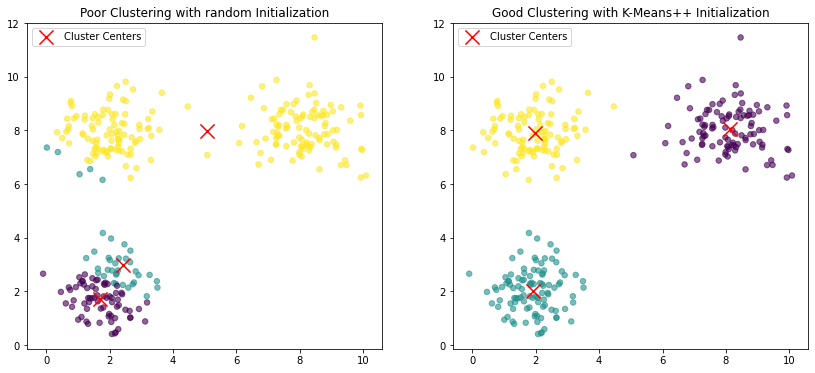

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data with clear clusters
X, _ = make_blobs(n_samples=300, centers=[[2, 2], [8, 8], [2, 8]], cluster_std=[0.8, 0.9, 0.8], random_state=42)

# Set the number of clusters
k = 3

# Poor Clustering: Custom poor random initialization where two centers are close together
init_centers = np.array([[2, 2], [2.5, 2.5], [5, 8]])  # Two centers are too close to each other

# KMeans with custom poor initialization
kmeans_poor = KMeans(n_clusters=k, init=init_centers, n_init=1, max_iter=1, random_state=42)
kmeans_poor.fit(X)
y_poor = kmeans_poor.predict(X)

# Good Clustering: KMeans with k-means++ initialization
kmeans_good = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_good.fit(X)
y_good = kmeans_good.predict(X)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for poor clustering
ax1.scatter(X[:, 0], X[:, 1], c=y_poor, s=30, cmap='viridis', marker='o', alpha=0.6)
ax1.scatter(kmeans_poor.cluster_centers_[:, 0], kmeans_poor.cluster_centers_[:, 1], 
            c='red', s=200, marker='x', label='Cluster Centers')
ax1.set_title('Poor Clustering with random Initialization')
ax1.legend()

# Plot for good clustering
ax2.scatter(X[:, 0], X[:, 1], c=y_good, s=30, cmap='viridis', marker='o', alpha=0.6)
ax2.scatter(kmeans_good.cluster_centers_[:, 0], kmeans_good.cluster_centers_[:, 1], 
            c='red', s=200, marker='x', label='Cluster Centers')
ax2.set_title('Good Clustering with K-Means++ Initialization')
ax2.legend()

plt.show()


2024-09-02 00:38:10,952 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010331.txt
2024-09-02 00:38:11,757 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010407.txt
2024-09-02 00:38:12,903 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010414.txt
2024-09-02 00:38:13,731 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010421.txt
2024-09-02 00:38:14,658 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010428.txt
2024-09-02 00:38:15,669 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010505.txt
2024-09-02 00:38:16,670 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010512.txt
2024-09-02 00:38:17,664 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010519.txt
2024-09-02 00:38:18,684 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010526.txt
2024-09-02 00:38:19,761 - INFO - Computing k-means++ for graph 1
2024-09-02 00:38:19,761 - 

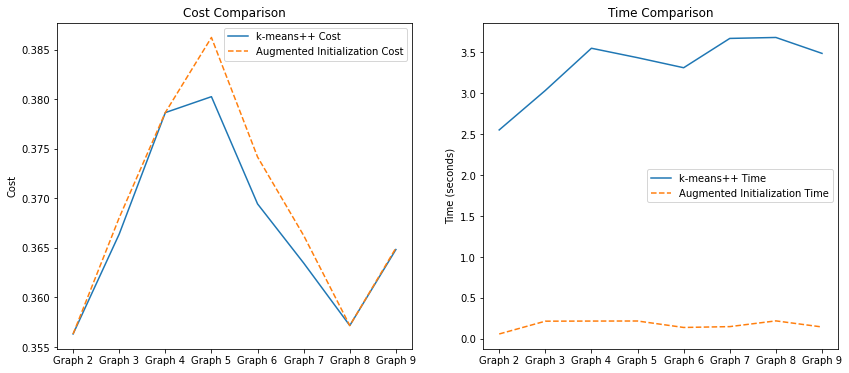

In [50]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def read_graph(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#") or not line.strip():
                continue
            from_node, to_node = map(int, line.split())
            if from_node not in graph:
                graph[from_node] = []
            if to_node not in graph:
                graph[to_node] = []
            graph[from_node].append(to_node)
            graph[to_node].append(from_node)
    return graph

def construct_adjacency_matrix(graph, num_nodes):
    adj_matrix = sp.lil_matrix((num_nodes, num_nodes))
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            adj_matrix[node, neighbor] = 1
            adj_matrix[neighbor, node] = 1
    return adj_matrix

def compute_laplacian(adj_matrix):
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    degrees[degrees == 0] = 1
    D_inv_sqrt = sp.diags(1.0 / np.sqrt(degrees))
    I = sp.eye(adj_matrix.shape[0])
    normalized_laplacian = I - D_inv_sqrt @ adj_matrix @ D_inv_sqrt
    return normalized_laplacian

def get_top_eigenvectors(laplacian, k=2):
    eigenvalues, eigenvectors = spla.eigsh(laplacian, k=k, which='SM')
    return eigenvectors

def compute_embeddings(file_path):
    logging.info(f"Reading graph from {file_path}")
    graph = read_graph(file_path)
    num_nodes = max(graph.keys()) + 1
    adj_matrix = construct_adjacency_matrix(graph, num_nodes)
    laplacian = compute_laplacian(adj_matrix)
    embeddings = get_top_eigenvectors(laplacian, k=2)
    return embeddings

def run_kmeans(embeddings, n_clusters=5, n_runs=20):
    logging.info("Running k-means++ 20 times to find the best initial centers")
    best_kmeans = None
    best_inertia = np.inf
    for i in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=i)
        kmeans.fit(embeddings)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
    return best_kmeans

def plot_embeddings(embeddings, centers, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5, alpha=0.7, c='blue')
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', marker='X')
    plt.title(title)
    plt.xlabel('First Eigenvector')
    plt.ylabel('Second Eigenvector')
    plt.grid(True)
    plt.show()

def compare_kmeans(file_paths, n_clusters=5):
    embeddings_list = [compute_embeddings(fp) for fp in file_paths]
    best_kmeans_results = []

    # Perform k-means++ 20 times on each graph and choose the best
    for i, embeddings in enumerate(embeddings_list):
        logging.info(f"Computing k-means++ for graph {i + 1}")
        start_time = time.time()
        best_kmeans = run_kmeans(embeddings, n_clusters=n_clusters, n_runs=30)
        elapsed_time = time.time() - start_time
        best_kmeans_results.append((best_kmeans, elapsed_time))
        logging.info(f"Best k-means++ run for graph {i + 1} took {elapsed_time:.2f} seconds with cost {best_kmeans.inertia_}")

    # Use the centers from the first graph to initialize Lloyd's algorithm on the other graphs
    initial_centers = best_kmeans_results[0][0].cluster_centers_
    costs_augmented = []
    times_augmented = []

    for i, (embeddings, (best_kmeans, _)) in enumerate(zip(embeddings_list[1:], best_kmeans_results[1:]), start=2):
        logging.info(f"Running Lloyd's algorithm on graph {i} using centers from graph 1")
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1, max_iter=300)
        kmeans.fit(embeddings)
        elapsed_time = time.time() - start_time
        costs_augmented.append(kmeans.inertia_)
        times_augmented.append(elapsed_time)
        logging.info(f"Lloyd's algorithm run for graph {i} took {elapsed_time:.2f} seconds with cost {kmeans.inertia_}")

    # Plot results
    x_labels = [f"Graph {i}" for i in range(2, len(file_paths) + 1)]
    normal_costs = [result[0].inertia_ for result in best_kmeans_results[1:]]
    normal_times = [result[1] for result in best_kmeans_results[1:]]

    plt.figure(figsize=(14, 6))

    # Plot cost comparison
    plt.subplot(1, 2, 1)
    plt.plot(x_labels, normal_costs, label='k-means++ Cost')
    plt.plot(x_labels, costs_augmented, label='Augmented Initialization Cost', linestyle='--')
    plt.ylabel('Cost')
    plt.title('Cost Comparison')
    plt.legend()

    # Plot time comparison
    plt.subplot(1, 2, 2)
    plt.plot(x_labels, normal_times, label='k-means++ Time')
    plt.plot(x_labels, times_augmented, label='Augmented Initialization Time', linestyle='--')
    plt.ylabel('Time (seconds)')
    plt.title('Time Comparison')
    plt.legend()

    plt.show()

# Example usage
file_paths = [
    r'C:/Users/maria/Desktop/oregon/oregon2_010331.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010407.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010414.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010421.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010428.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010505.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010512.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010519.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010526.txt'
]

# Compare the k-means results
compare_kmeans(file_paths, n_clusters=5)


Computing best centroids for the first dataset with K-means++...
K-means++ run 1: Cost = 7233.79
K-means++ run 2: Cost = 7314.54
K-means++ run 3: Cost = 7285.61
K-means++ run 4: Cost = 7210.79
K-means++ run 5: Cost = 7207.65
K-means++ run 6: Cost = 7210.68
K-means++ run 7: Cost = 7233.81
K-means++ run 8: Cost = 7293.26
K-means++ run 9: Cost = 7270.04
K-means++ run 10: Cost = 7364.66
K-means++ run 11: Cost = 7270.01
K-means++ run 12: Cost = 7210.79
K-means++ run 13: Cost = 7215.30
K-means++ run 14: Cost = 7233.47
K-means++ run 15: Cost = 7233.32
K-means++ run 16: Cost = 7209.62
K-means++ run 17: Cost = 7233.26
K-means++ run 18: Cost = 7270.62
K-means++ run 19: Cost = 7263.89
K-means++ run 20: Cost = 7235.36

Processing dataset 1 with 10000 points...
Cost with initialized centroids: 7207.46, Time: 0.0100 seconds
Computing K-means++ without initialized centroids...
Cost without initialized centroids: 7206.53, Time: 0.5286 seconds

Processing dataset 2 with 10000 points...
Cost with initia

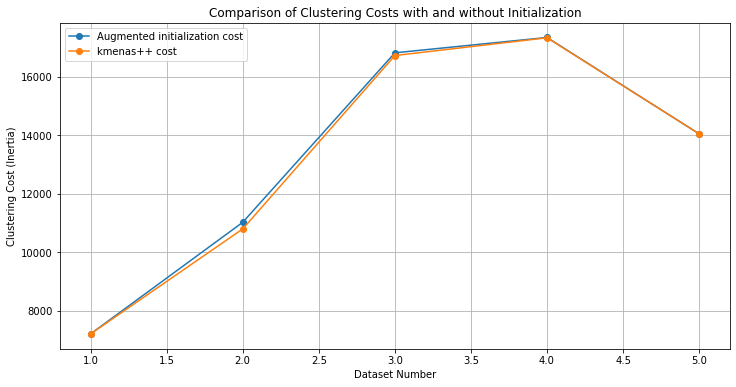

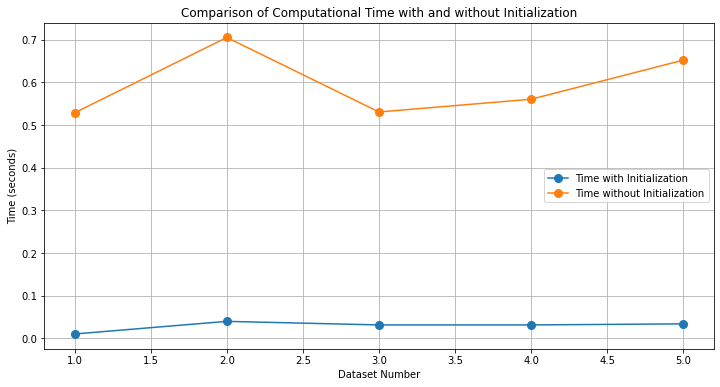

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Function to generate synthetic data with significant overlap
def generate_synthetic_data(centers, num_samples, std_dev=1.0, variation_factor=0.5):
    np.random.seed(None)  # Remove seed to allow random variation
    data = []
    samples_per_cluster = num_samples // len(centers)
    for center in centers:
        # Introduce significant random variation to each center to create overlap
        varied_center = center + np.random.randn(2) * variation_factor
        cluster_data = np.random.randn(samples_per_cluster, 2) * std_dev + varied_center  # Gaussian data around varied centers
        data.append(cluster_data)
    return np.vstack(data)

# Define centers for 5 clusters
centers = np.array([[0.1, 0.1], [-0.1, -0.1], [0.1, -0.1], [-0.1, 0.1], [0, 0]])  # 5 cluster centers
num_samples = 10000  # Each dataset has 10,000 points

# Generate 5 datasets with increased variability and overlap
datasets = []
for i in range(5):
    # Introduce more variability in standard deviation and center variation
    std_dev = 1.0 + 0.5 * np.random.rand()
    variation_factor = 0.5 + 0.5 * np.random.rand()
    dataset = generate_synthetic_data(centers, num_samples, std_dev=std_dev, variation_factor=variation_factor)
    datasets.append(dataset)

# Function to compute the best k-means++ centroids
def compute_best_kmeans_centroids(data, num_clusters=5, num_runs=20):
    best_kmeans = None
    best_cost = float('inf')
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
        kmeans.fit(data)
        cost = kmeans.inertia_  # Clustering cost
        if cost < best_cost:
            best_cost = cost
            best_kmeans = kmeans
        print(f"K-means++ run {i+1}: Cost = {cost:.2f}")
    return best_kmeans.cluster_centers_, best_cost

# Compute the best centroids for the first dataset
print("Computing best centroids for the first dataset with K-means++...")
initial_centroids, initial_cost = compute_best_kmeans_centroids(datasets[0])

# Function to perform Lloyd's algorithm with specified initial centroids
def lloyds_algorithm_with_initialization(data, initial_centroids):
    kmeans = KMeans(n_clusters=len(initial_centroids), init=initial_centroids, n_init=1, max_iter=500)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    return cost, elapsed_time

# Perform Lloyd's algorithm on all datasets with initialization from the best centroids of the first dataset
costs_with_init = []
costs_without_init = []
times_with_init = []
times_without_init = []

for i, data in enumerate(datasets):
    print(f"\nProcessing dataset {i+1} with {len(data)} points...")

    # Clustering with initialized centroids
    cost_with_init, time_with_init = lloyds_algorithm_with_initialization(data, initial_centroids)
    costs_with_init.append(cost_with_init)
    times_with_init.append(time_with_init)
    print(f"Cost with initialized centroids: {cost_with_init:.2f}, Time: {time_with_init:.4f} seconds")

    # Clustering without initialization (Standard K-means++)
    print("Computing K-means++ without initialized centroids...")
    start_time = time.time()
    kmeans_standard = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=20)
    kmeans_standard.fit(data)
    time_without_init = time.time() - start_time
    cost_without_init = kmeans_standard.inertia_
    costs_without_init.append(cost_without_init)
    times_without_init.append(time_without_init)
    print(f"Cost without initialized centroids: {cost_without_init:.2f}, Time: {time_without_init:.4f} seconds")

# Plot of clustering costs
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), costs_with_init, label='Augmented initialization cost', marker='o', linestyle='-')
plt.plot(range(1, 6), costs_without_init, label='kmenas++ cost', marker='o', linestyle='-')
plt.title('Comparison of Clustering Costs with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Clustering Cost (Inertia)')
plt.legend()
plt.grid(True)
plt.show()

# Plot of computational times
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), times_with_init, label='Time with Initialization', marker='o', linestyle='-', markersize=8)
plt.plot(range(1, 6), times_without_init, label='Time without Initialization', marker='o', linestyle='-', markersize=8)
plt.title('Comparison of Computational Time with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


Computing best centroids for the first dataset with K-means++...
K-means++ run 1: Cost = 33859.10
K-means++ run 2: Cost = 33860.21
K-means++ run 3: Cost = 33859.44
K-means++ run 4: Cost = 33858.16
K-means++ run 5: Cost = 33860.60
K-means++ run 6: Cost = 33858.94
K-means++ run 7: Cost = 33860.17
K-means++ run 8: Cost = 33859.03
K-means++ run 9: Cost = 33859.31
K-means++ run 10: Cost = 33859.18
K-means++ run 11: Cost = 33859.11
K-means++ run 12: Cost = 33859.34
K-means++ run 13: Cost = 33859.90
K-means++ run 14: Cost = 33859.65
K-means++ run 15: Cost = 37505.61
K-means++ run 16: Cost = 33858.21
K-means++ run 17: Cost = 33858.85
K-means++ run 18: Cost = 33859.84
K-means++ run 19: Cost = 33858.52
K-means++ run 20: Cost = 33859.82

Processing dataset 1 with 50000 points...
Cost with initialized centroids: 33857.52, Time: 0.0282 seconds
Computing K-means++ without initialized centroids...
Cost without initialized centroids: 33858.09, Time: 1.1555 seconds

Processing dataset 2 with 50000 poin

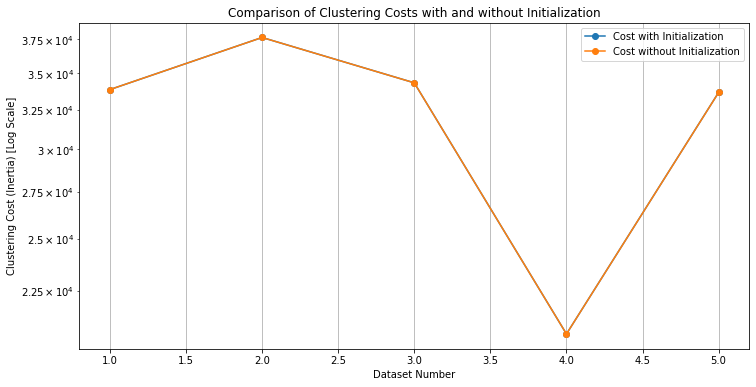

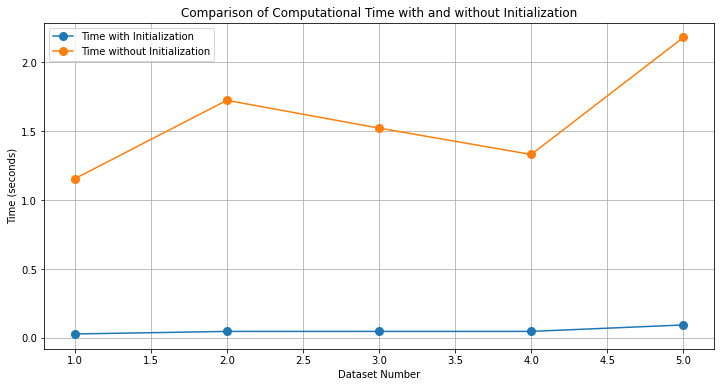

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Function to generate synthetic data with variability
def generate_synthetic_data(centers, num_samples, std_dev=0.5, variation_factor=0.1):
    np.random.seed(None)  # Remove seed to allow random variation
    data = []
    samples_per_cluster = num_samples // len(centers)
    for center in centers:
        # Introduce significant random variation to each center to create variability
        varied_center = center + np.random.randn(2) * variation_factor
        cluster_data = np.random.randn(samples_per_cluster, 2) * std_dev + varied_center  # Gaussian data around varied centers
        data.append(cluster_data)
    return np.vstack(data)

# Define centers for 5 clusters
centers = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])  # 5 cluster centers
num_samples = 50000  # Each dataset has 50,000 points

# Generate 5 datasets with increased variability
datasets = []
for i in range(5):
    # Introduce more variability in standard deviation and center variation
    std_dev = 0.5 + 0.3 * np.random.rand()
    variation_factor = 0.2 + 0.2 * np.random.rand()
    dataset = generate_synthetic_data(centers, num_samples, std_dev=std_dev, variation_factor=variation_factor)
    datasets.append(dataset)

# Function to compute the best k-means++ centroids
def compute_best_kmeans_centroids(data, num_clusters=5, num_runs=20):
    best_kmeans = None
    best_cost = float('inf')
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
        kmeans.fit(data)
        cost = kmeans.inertia_  # Clustering cost
        if cost < best_cost:
            best_cost = cost
            best_kmeans = kmeans
        print(f"K-means++ run {i+1}: Cost = {cost:.2f}")
    return best_kmeans.cluster_centers_, best_cost

# Compute the best centroids for the first dataset
print("Computing best centroids for the first dataset with K-means++...")
initial_centroids, initial_cost = compute_best_kmeans_centroids(datasets[0])

# Function to perform Lloyd's algorithm with specified initial centroids
def lloyds_algorithm_with_initialization(data, initial_centroids):
    kmeans = KMeans(n_clusters=len(initial_centroids), init=initial_centroids, n_init=1, max_iter=500)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    return cost, elapsed_time

# Perform Lloyd's algorithm on all datasets with initialization from the best centroids of the first dataset
costs_with_init = []
costs_without_init = []
times_with_init = []
times_without_init = []

for i, data in enumerate(datasets):
    print(f"\nProcessing dataset {i+1} with {len(data)} points...")

    # Clustering with initialized centroids
    cost_with_init, time_with_init = lloyds_algorithm_with_initialization(data, initial_centroids)
    costs_with_init.append(cost_with_init)
    times_with_init.append(time_with_init)
    print(f"Cost with initialized centroids: {cost_with_init:.2f}, Time: {time_with_init:.4f} seconds")

    # Clustering without initialization (Standard K-means++)
    print("Computing K-means++ without initialized centroids...")
    start_time = time.time()
    kmeans_standard = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=20)
    kmeans_standard.fit(data)
    time_without_init = time.time() - start_time
    cost_without_init = kmeans_standard.inertia_
    costs_without_init.append(cost_without_init)
    times_without_init.append(time_without_init)
    print(f"Cost without initialized centroids: {cost_without_init:.2f}, Time: {time_without_init:.4f} seconds")

# Plot of clustering costs with logarithmic scale
plt.figure(figsize=(12, 6))
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.plot(range(1, 6), costs_with_init, label='Cost with Initialization', marker='o', linestyle='-')
plt.plot(range(1, 6), costs_without_init, label='Cost without Initialization', marker='o', linestyle='-')
plt.title('Comparison of Clustering Costs with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Clustering Cost (Inertia) [Log Scale]')
plt.legend()
plt.grid(True)
plt.show()

# Plot of computational times with larger markers
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), times_with_init, label='Time with Initialization', marker='o', linestyle='-', markersize=8)
plt.plot(range(1, 6), times_without_init, label='Time without Initialization', marker='o', linestyle='-', markersize=8)
plt.title('Comparison of Computational Time with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


Data contains NaN or infinity values. Cleaning the data...
Computing best centroids for the first dataset with K-means++...
K-means++ run 1: Cost = 91111517780.86
K-means++ run 2: Cost = 92596016047.36
K-means++ run 3: Cost = 92169805145.97
K-means++ run 4: Cost = 91967631803.86
K-means++ run 5: Cost = 92419792344.52
K-means++ run 6: Cost = 92763815188.75
K-means++ run 7: Cost = 92290891409.49
K-means++ run 8: Cost = 91137957996.70
K-means++ run 9: Cost = 92271496803.14
K-means++ run 10: Cost = 92290891409.49
K-means++ run 11: Cost = 92220530135.74
K-means++ run 12: Cost = 92708034985.16
K-means++ run 13: Cost = 91968895637.00
K-means++ run 14: Cost = 93540981358.38
K-means++ run 15: Cost = 92530084002.55
K-means++ run 16: Cost = 92084466095.89
K-means++ run 17: Cost = 91969994750.71
K-means++ run 18: Cost = 91967803756.45
K-means++ run 19: Cost = 92595933910.96
K-means++ run 20: Cost = 91111739359.10

Processing second dataset...
Cost with initialized centroids: 89640618472.60, Time: 

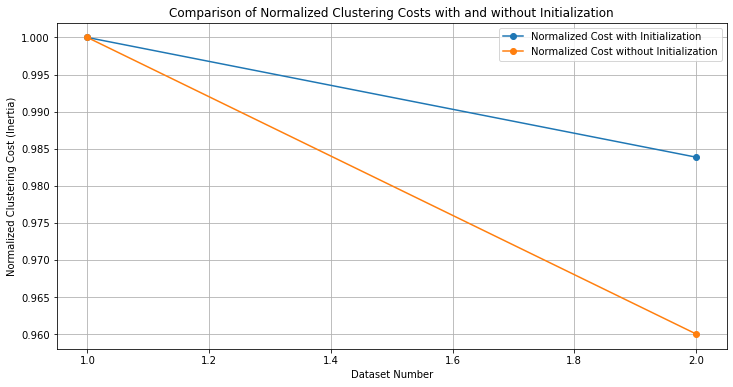

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

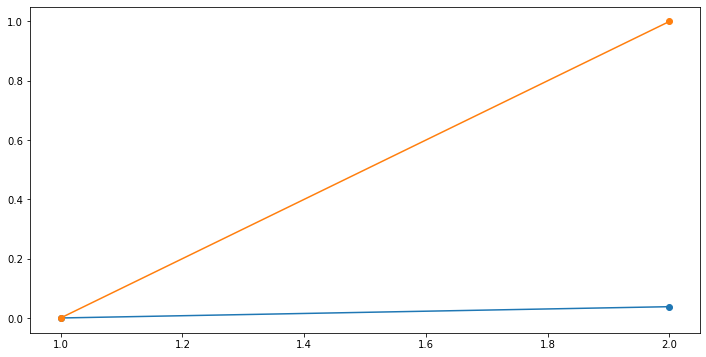

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Load the CSV file into a pandas DataFrame
file_path = r'C:/Users/maria/Desktop/Customer_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract features for clustering (remove non-numeric columns like 'CUST_ID')
features = data.iloc[:, 1:].values  # Assuming the first column is 'CUST_ID'

# Check for NaN or infinite values
if np.isnan(features).any() or np.isinf(features).any():
    print("Data contains NaN or infinity values. Cleaning the data...")
    
    # Handle NaN values: fill them with the column mean or drop them
    df_features = pd.DataFrame(features)
    df_features = df_features.fillna(df_features.mean())  # Fill NaNs with column mean
    features = df_features.values
    
    # Handle infinite values: replace them with a large finite number
    features[np.isinf(features)] = np.finfo(np.float64).max

# Split the data into two random subsets
np.random.seed(42)  # For reproducibility
np.random.shuffle(features)

# Split into two equal parts
split_index = len(features) // 2
data1 = features[:split_index]
data2 = features[split_index:]

# Function to compute the best k-means++ centroids
def compute_best_kmeans_centroids(data, num_clusters=5, num_runs=20):
    best_kmeans = None
    best_cost = float('inf')
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
        kmeans.fit(data)
        cost = kmeans.inertia_  # Clustering cost
        if cost < best_cost:
            best_cost = cost
            best_kmeans = kmeans
        print(f"K-means++ run {i+1}: Cost = {cost:.2f}")
    return best_kmeans.cluster_centers_, best_cost

# Compute the best centroids for the first dataset
print("Computing best centroids for the first dataset with K-means++...")
initial_centroids, initial_cost = compute_best_kmeans_centroids(data1)

# Function to perform Lloyd's algorithm with specified initial centroids
def lloyds_algorithm_with_initialization(data, initial_centroids):
    kmeans = KMeans(n_clusters=len(initial_centroids), init=initial_centroids, n_init=1, max_iter=500)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    n_iter = kmeans.n_iter_  # Number of iterations for convergence
    return cost, elapsed_time, n_iter

# Perform Lloyd's algorithm on the second dataset with initialization from the best centroids of the first dataset
print("\nProcessing second dataset...")
cost_with_init, time_with_init, n_iter_with_init = lloyds_algorithm_with_initialization(data2, initial_centroids)
print(f"Cost with initialized centroids: {cost_with_init:.2f}, Time: {time_with_init:.4f} seconds, Iterations: {n_iter_with_init}")

# Perform K-means++ on the second dataset without initialized centroids
print("Computing K-means++ without initialized centroids on the second dataset...")
start_time = time.time()
kmeans_standard = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=20)
kmeans_standard.fit(data2)
time_without_init = time.time() - start_time
cost_without_init = kmeans_standard.inertia_
n_iter_without_init = kmeans_standard.n_iter_  # Number of iterations for convergence
print(f"Cost without initialized centroids: {cost_without_init:.2f}, Time: {time_without_init:.4f} seconds, Iterations: {n_iter_without_init}")

# Plot and compare normalized costs and computational times
costs_with_init = [initial_cost, cost_with_init]
costs_without_init = [initial_cost, cost_without_init]
times_with_init = [0, time_with_init]  # No time for initial centroids
times_without_init = [0, time_without_init]

# Normalize the costs for comparison
max_cost = max(max(costs_with_init), max(costs_without_init))
normalized_costs_with_init = [cost / max_cost for cost in costs_with_init]
normalized_costs_without_init = [cost / max_cost for cost in costs_without_init]

# Plot of normalized clustering costs
plt.figure(figsize=(12, 6))
plt.plot(range(1, 3), normalized_costs_with_init, label='Normalized Cost with Initialization', marker='o')
plt.plot(range(1, 3), normalized_costs_without_init, label='Normalized Cost without Initialization', marker='o')
plt.title('Comparison of Normalized Clustering Costs with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Normalized Clustering Cost (Inertia)')
plt.legend()
plt.grid(True)
plt.show()

# Normalize computational times for comparison
max_time = max(max(times_with_init), max(times_without_init))
normalized_times_with_init = [time / max_time for time in times_with_init]
normalized_times_without_init = [time / max_time for time in times_without_init]

# Plot of normalized computational times
plt.figure(figsize=(12, 6))
plt.plot(range(1, 3), normalized_times_with_init, label='Normalized Time with Initialization', marker='o')
plt.plot(range(1, 3), normalized_times_without_init, label='Normalized Time without Initialization', marker='o')
plt.title


Computing best centroids for the first dataset with K-means++...
K-means++ run 1: Cost = 29355.80
K-means++ run 2: Cost = 29357.97
K-means++ run 3: Cost = 29356.13
K-means++ run 4: Cost = 29359.27
K-means++ run 5: Cost = 29356.37
K-means++ run 6: Cost = 29357.70
K-means++ run 7: Cost = 29358.51
K-means++ run 8: Cost = 29355.61
K-means++ run 9: Cost = 29355.76
K-means++ run 10: Cost = 29359.21
K-means++ run 11: Cost = 29356.36
K-means++ run 12: Cost = 29356.22
K-means++ run 13: Cost = 29353.26
K-means++ run 14: Cost = 29356.49
K-means++ run 15: Cost = 29355.77
K-means++ run 16: Cost = 29355.83
K-means++ run 17: Cost = 29355.76
K-means++ run 18: Cost = 29356.24
K-means++ run 19: Cost = 29356.09
K-means++ run 20: Cost = 29357.70

Processing dataset 1 with 50000 points...
Cost with initialized centroids: 29352.75, Time: 0.0312 seconds, Iterations: 1
Computing K-means++ without initialized centroids...
Cost without initialized centroids: 29354.95, Time: 2.8040 seconds, Iterations: 17

Proce

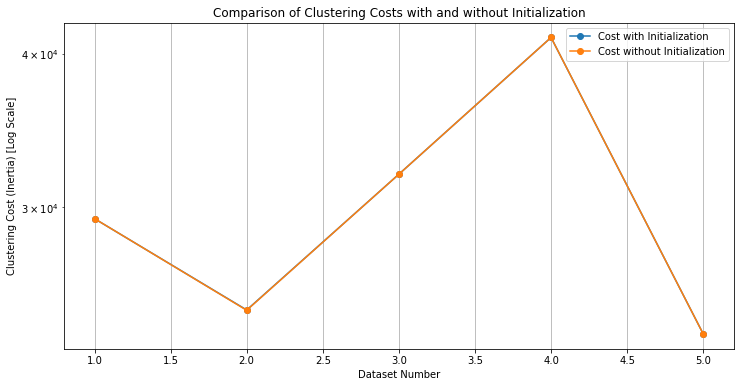

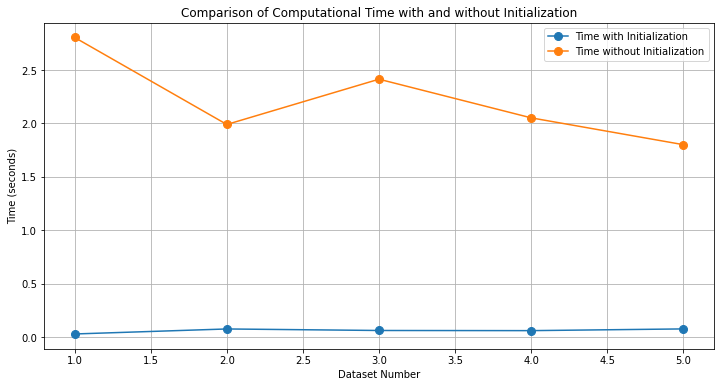

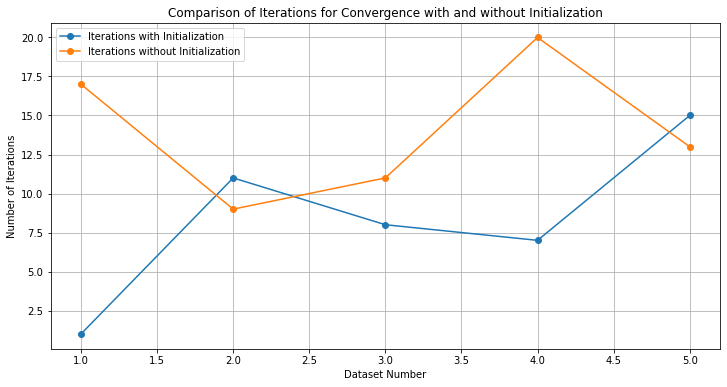

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Function to generate synthetic data with variability
def generate_synthetic_data(centers, num_samples, std_dev=0.5, variation_factor=0.1):
    np.random.seed(None)  # Remove seed to allow random variation
    data = []
    samples_per_cluster = num_samples // len(centers)
    for center in centers:
        # Introduce significant random variation to each center to create variability
        varied_center = center + np.random.randn(2) * variation_factor
        cluster_data = np.random.randn(samples_per_cluster, 2) * std_dev + varied_center  # Gaussian data around varied centers
        data.append(cluster_data)
    return np.vstack(data)

# Define centers for 5 clusters
centers = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])  # 5 cluster centers
num_samples = 50000  # Each dataset has 50,000 points

# Generate 5 datasets with increased variability
datasets = []
for i in range(5):
    # Introduce more variability in standard deviation and center variation
    std_dev = 0.5 + 0.3 * np.random.rand()
    variation_factor = 0.2 + 0.2 * np.random.rand()
    dataset = generate_synthetic_data(centers, num_samples, std_dev=std_dev, variation_factor=variation_factor)
    datasets.append(dataset)

# Function to compute the best k-means++ centroids
def compute_best_kmeans_centroids(data, num_clusters=5, num_runs=20):
    best_kmeans = None
    best_cost = float('inf')
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
        kmeans.fit(data)
        cost = kmeans.inertia_  # Clustering cost
        if cost < best_cost:
            best_cost = cost
            best_kmeans = kmeans
        print(f"K-means++ run {i+1}: Cost = {cost:.2f}")
    return best_kmeans.cluster_centers_, best_cost

# Compute the best centroids for the first dataset
print("Computing best centroids for the first dataset with K-means++...")
initial_centroids, initial_cost = compute_best_kmeans_centroids(datasets[0])

# Function to perform Lloyd's algorithm with specified initial centroids
def lloyds_algorithm_with_initialization(data, initial_centroids):
    kmeans = KMeans(n_clusters=len(initial_centroids), init=initial_centroids, n_init=1, max_iter=500)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    n_iter = kmeans.n_iter_  # Number of iterations for convergence
    return cost, elapsed_time, n_iter

# Perform Lloyd's algorithm on all datasets with initialization from the best centroids of the first dataset
costs_with_init = []
costs_without_init = []
times_with_init = []
times_without_init = []
iterations_with_init = []
iterations_without_init = []

for i, data in enumerate(datasets):
    print(f"\nProcessing dataset {i+1} with {len(data)} points...")

    # Clustering with initialized centroids
    cost_with_init, time_with_init, n_iter_with_init = lloyds_algorithm_with_initialization(data, initial_centroids)
    costs_with_init.append(cost_with_init)
    times_with_init.append(time_with_init)
    iterations_with_init.append(n_iter_with_init)
    print(f"Cost with initialized centroids: {cost_with_init:.2f}, Time: {time_with_init:.4f} seconds, Iterations: {n_iter_with_init}")

    # Clustering without initialization (Standard K-means++)
    print("Computing K-means++ without initialized centroids...")
    start_time = time.time()
    kmeans_standard = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=20)
    kmeans_standard.fit(data)
    time_without_init = time.time() - start_time
    cost_without_init = kmeans_standard.inertia_
    n_iter_without_init = kmeans_standard.n_iter_  # Number of iterations for convergence
    costs_without_init.append(cost_without_init)
    times_without_init.append(time_without_init)
    iterations_without_init.append(n_iter_without_init)
    print(f"Cost without initialized centroids: {cost_without_init:.2f}, Time: {time_without_init:.4f} seconds, Iterations: {n_iter_without_init}")

# Plot of clustering costs with logarithmic scale
plt.figure(figsize=(12, 6))
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.plot(range(1, 6), costs_with_init, label='Cost with Initialization', marker='o', linestyle='-')
plt.plot(range(1, 6), costs_without_init, label='Cost without Initialization', marker='o', linestyle='-')
plt.title('Comparison of Clustering Costs with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Clustering Cost (Inertia) [Log Scale]')
plt.legend()
plt.grid(True)
plt.show()

# Plot of computational times with larger markers
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), times_with_init, label='Time with Initialization', marker='o', linestyle='-', markersize=8)
plt.plot(range(1, 6), times_without_init, label='Time without Initialization', marker='o', linestyle='-', markersize=8)
plt.title('Comparison of Computational Time with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Plot of iterations needed for convergence
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), iterations_with_init, label='Iterations with Initialization', marker='o', linestyle='-')
plt.plot(range(1, 6), iterations_without_init, label='Iterations without Initialization', marker='o', linestyle='-')
plt.title('Comparison of Iterations for Convergence with and without Initialization')
plt.xlabel('Dataset Number')
plt.ylabel('Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()


2024-09-02 23:46:34,619 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010331.txt
2024-09-02 23:46:35,727 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-02 23:46:35,743 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010407.txt
2024-09-02 23:46:36,777 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-02 23:46:36,808 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010414.txt
2024-09-02 23:46:37,859 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-02 23:46:37,875 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010421.txt
2024-09-02 23:46:38,830 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-02 23:46:38,845 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010428.txt
2024-09-02 23:46:39,957 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-02 23:46:39,973 - INFO - Reading graph from C:/Users/maria/Des

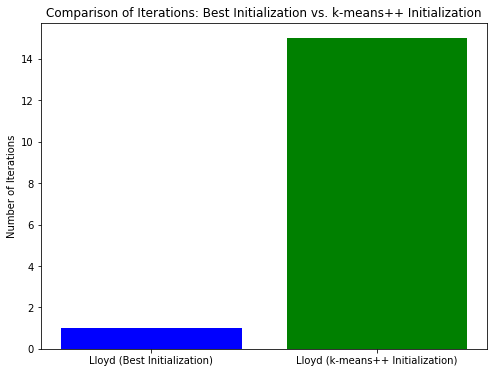

2024-09-02 23:46:47,936 - INFO - Lloyd's algorithm with best initialization converged in 1 iterations
2024-09-02 23:46:47,936 - INFO - Lloyd's algorithm with k-means++ initialization converged in 15 iterations


2024-09-03 01:13:43,410 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010331.txt
2024-09-03 01:13:44,200 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-03 01:13:44,216 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010407.txt
2024-09-03 01:13:44,992 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-03 01:13:45,000 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010414.txt
2024-09-03 01:13:45,740 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-03 01:13:45,755 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010421.txt
2024-09-03 01:13:46,402 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-03 01:13:46,418 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010428.txt
2024-09-03 01:13:47,116 - INFO - Eigenvalue computation converged after 1 iterations
2024-09-03 01:13:47,129 - INFO - Reading graph from C:/Users/maria/Des

2024-09-03 01:13:54,841 - INFO - k-means++ run 28 converged in 9 iterations with cost 0.35637901533928174
2024-09-03 01:13:54,921 - INFO - k-means++ run 29 converged in 9 iterations with cost 0.3563790153392817
2024-09-03 01:13:54,990 - INFO - k-means++ run 30 converged in 11 iterations with cost 0.35637901533928174
2024-09-03 01:13:54,990 - INFO - Best k-means++ run converged in 17 iterations
2024-09-03 01:13:54,990 - INFO - Best k-means++ run for graph 2 took 2.58 seconds with cost 0.35631821862582097
2024-09-03 01:13:54,990 - INFO - Computing k-means++ for graph 3
2024-09-03 01:13:55,006 - INFO - Running k-means++ 20 times to find the best initial centers
2024-09-03 01:13:55,090 - INFO - k-means++ run 1 converged in 9 iterations with cost 0.36782628590141714
2024-09-03 01:13:55,171 - INFO - k-means++ run 2 converged in 11 iterations with cost 0.36782628590141725
2024-09-03 01:13:55,239 - INFO - k-means++ run 3 converged in 7 iterations with cost 0.36782628590141725
2024-09-03 01:13:

2024-09-03 01:14:01,020 - INFO - k-means++ run 6 converged in 13 iterations with cost 0.3853768466490244
2024-09-03 01:14:01,122 - INFO - k-means++ run 7 converged in 21 iterations with cost 0.3862243432816965
2024-09-03 01:14:01,208 - INFO - k-means++ run 8 converged in 8 iterations with cost 0.3802707153752846
2024-09-03 01:14:01,305 - INFO - k-means++ run 9 converged in 18 iterations with cost 0.3802707153752846
2024-09-03 01:14:01,373 - INFO - k-means++ run 10 converged in 8 iterations with cost 0.3862506495795624
2024-09-03 01:14:01,470 - INFO - k-means++ run 11 converged in 14 iterations with cost 0.4866067600018361
2024-09-03 01:14:01,556 - INFO - k-means++ run 12 converged in 13 iterations with cost 0.3802890520539216
2024-09-03 01:14:01,640 - INFO - k-means++ run 13 converged in 15 iterations with cost 0.3802707153752846
2024-09-03 01:14:01,740 - INFO - k-means++ run 14 converged in 17 iterations with cost 0.3802707153752846
2024-09-03 01:14:01,824 - INFO - k-means++ run 15 co

2024-09-03 01:14:08,807 - INFO - k-means++ run 18 converged in 9 iterations with cost 0.48302787638406636
2024-09-03 01:14:08,946 - INFO - k-means++ run 19 converged in 16 iterations with cost 0.4830551317534604
2024-09-03 01:14:09,121 - INFO - k-means++ run 20 converged in 23 iterations with cost 0.36377767245868226
2024-09-03 01:14:09,254 - INFO - k-means++ run 21 converged in 16 iterations with cost 0.36348415569701176
2024-09-03 01:14:09,376 - INFO - k-means++ run 22 converged in 12 iterations with cost 0.36376461657428283
2024-09-03 01:14:09,483 - INFO - k-means++ run 23 converged in 9 iterations with cost 0.36347257156374013
2024-09-03 01:14:09,573 - INFO - k-means++ run 24 converged in 7 iterations with cost 0.3637866816658121
2024-09-03 01:14:09,725 - INFO - k-means++ run 25 converged in 20 iterations with cost 0.36625170269851104
2024-09-03 01:14:09,874 - INFO - k-means++ run 26 converged in 18 iterations with cost 0.3637988088917108
2024-09-03 01:14:10,024 - INFO - k-means++ 

2024-09-03 01:14:18,106 - INFO - k-means++ run 29 converged in 13 iterations with cost 0.3649593558291181
2024-09-03 01:14:18,239 - INFO - k-means++ run 30 converged in 15 iterations with cost 0.3650012719301474
2024-09-03 01:14:18,239 - INFO - Best k-means++ run converged in 7 iterations
2024-09-03 01:14:18,239 - INFO - Best k-means++ run for graph 9 took 3.80 seconds with cost 0.36483711988076883
2024-09-03 01:14:18,239 - INFO - Running Lloyd's algorithm on graph 2 using centers from graph 1
2024-09-03 01:14:18,361 - INFO - Lloyd's algorithm run for graph 2 took 0.12 seconds with cost 0.3563374193800477 and converged in 14 iterations
2024-09-03 01:14:18,363 - INFO - Running Lloyd's algorithm on graph 3 using centers from graph 1
2024-09-03 01:14:18,617 - INFO - Lloyd's algorithm run for graph 3 took 0.25 seconds with cost 0.3680438569449769 and converged in 36 iterations
2024-09-03 01:14:18,617 - INFO - Running Lloyd's algorithm on graph 4 using centers from graph 1
2024-09-03 01:14:

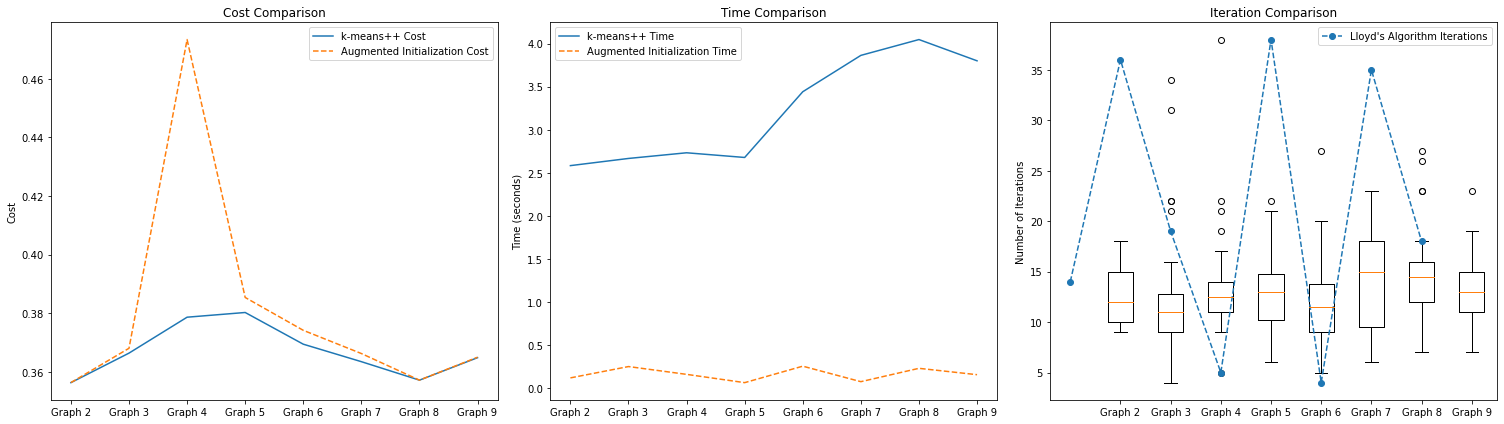

In [16]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def read_graph(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#") or not line.strip():
                continue
            from_node, to_node = map(int, line.split())
            if from_node not in graph:
                graph[from_node] = []
            if to_node not in graph:
                graph[to_node] = []
            graph[from_node].append(to_node)
            graph[to_node].append(from_node)
    return graph

def construct_adjacency_matrix(graph, num_nodes):
    adj_matrix = sp.lil_matrix((num_nodes, num_nodes))
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            adj_matrix[node, neighbor] = 1
            adj_matrix[neighbor, node] = 1
    return adj_matrix

def compute_laplacian(adj_matrix):
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    degrees[degrees == 0] = 1
    D_inv_sqrt = sp.diags(1.0 / np.sqrt(degrees))
    I = sp.eye(adj_matrix.shape[0])
    normalized_laplacian = I - D_inv_sqrt @ adj_matrix @ D_inv_sqrt
    return normalized_laplacian

def get_top_eigenvectors(laplacian, k=2, tol=1e-5, max_iter=1000):
    converged = False
    num_iter = 0
    while not converged and num_iter < max_iter:
        eigenvalues, eigenvectors = spla.eigsh(laplacian, k=k, which='SM', tol=tol)
        residuals = laplacian @ eigenvectors - eigenvectors @ np.diag(eigenvalues)
        if np.max(np.linalg.norm(residuals, axis=0)) < tol:
            converged = True
        num_iter += 1
    
    logging.info(f"Eigenvalue computation converged after {num_iter} iterations")
    return eigenvectors

def compute_embeddings(file_path):
    logging.info(f"Reading graph from {file_path}")
    graph = read_graph(file_path)
    num_nodes = max(graph.keys()) + 1
    adj_matrix = construct_adjacency_matrix(graph, num_nodes)
    laplacian = compute_laplacian(adj_matrix)
    embeddings = get_top_eigenvectors(laplacian, k=2)
    return embeddings

def run_kmeans(embeddings, n_clusters=5, n_runs=20):
    logging.info("Running k-means++ 20 times to find the best initial centers")
    best_kmeans = None
    best_inertia = np.inf
    best_iterations = 0  # Track the number of iterations for the best run
    all_iterations = []  # Store the number of iterations for each run
    
    for i in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=i)
        kmeans.fit(embeddings)
        all_iterations.append(kmeans.n_iter_)  # Record the number of iterations
        logging.info(f"k-means++ run {i+1} converged in {kmeans.n_iter_} iterations with cost {kmeans.inertia_}")
        
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
            best_iterations = kmeans.n_iter_
    
    logging.info(f"Best k-means++ run converged in {best_iterations} iterations")
    return best_kmeans, all_iterations

def plot_embeddings(embeddings, centers, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5, alpha=0.7, c='blue')
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', marker='X')
    plt.title(title)
    plt.xlabel('First Eigenvector')
    plt.ylabel('Second Eigenvector')
    plt.grid(True)
    plt.show()

def compare_kmeans(file_paths, n_clusters=5):
    embeddings_list = [compute_embeddings(fp) for fp in file_paths]
    best_kmeans_results = []
    all_iterations_list = []  # To store iterations for each k-means++ run

    # Perform k-means++ 20 times on each graph and choose the best
    for i, embeddings in enumerate(embeddings_list):
        logging.info(f"Computing k-means++ for graph {i + 1}")
        start_time = time.time()
        best_kmeans, all_iterations = run_kmeans(embeddings, n_clusters=n_clusters, n_runs=30)
        elapsed_time = time.time() - start_time
        best_kmeans_results.append((best_kmeans, elapsed_time))
        all_iterations_list.append(all_iterations)
        logging.info(f"Best k-means++ run for graph {i + 1} took {elapsed_time:.2f} seconds with cost {best_kmeans.inertia_}")

    # Use the centers from the first graph to initialize Lloyd's algorithm on the other graphs
    initial_centers = best_kmeans_results[0][0].cluster_centers_
    costs_augmented = []
    times_augmented = []
    lloyd_iterations = []  # Store iterations for Lloyd's algorithm

    for i, (embeddings, (best_kmeans, _)) in enumerate(zip(embeddings_list[1:], best_kmeans_results[1:]), start=2):
        logging.info(f"Running Lloyd's algorithm on graph {i} using centers from graph 1")
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1, max_iter=300)
        kmeans.fit(embeddings)
        elapsed_time = time.time() - start_time
        costs_augmented.append(kmeans.inertia_)
        times_augmented.append(elapsed_time)
        lloyd_iterations.append(kmeans.n_iter_)
        logging.info(f"Lloyd's algorithm run for graph {i} took {elapsed_time:.2f} seconds with cost {kmeans.inertia_} and converged in {kmeans.n_iter_} iterations")

    # Plot results
    x_labels = [f"Graph {i}" for i in range(2, len(file_paths) + 1)]
    normal_costs = [result[0].inertia_ for result in best_kmeans_results[1:]]
    normal_times = [result[1] for result in best_kmeans_results[1:]]

    plt.figure(figsize=(21, 6))

    # Plot cost comparison
    plt.subplot(1, 3, 1)
    plt.plot(x_labels, normal_costs, label='k-means++ Cost')
    plt.plot(x_labels, costs_augmented, label='Augmented Initialization Cost', linestyle='--')
    plt.ylabel('Cost')
    plt.title('Cost Comparison')
    plt.legend()

    # Plot time comparison
    plt.subplot(1, 3, 2)
    plt.plot(x_labels, normal_times, label='k-means++ Time')
    plt.plot(x_labels, times_augmented, label='Augmented Initialization Time', linestyle='--')
    plt.ylabel('Time (seconds)')
    plt.title('Time Comparison')
    plt.legend()

    # Plot iteration comparison for k-means++ and Lloyd's algorithm
    plt.subplot(1, 3, 3)
    plt.boxplot(all_iterations_list[1:], labels=x_labels)  # Plot k-means++ iterations
    plt.plot(x_labels, lloyd_iterations, label="Lloyd's Algorithm Iterations", linestyle='--', marker='o')
    plt.ylabel('Number of Iterations')
    plt.title('Iteration Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
file_paths = [
    r'C:/Users/maria/Desktop/oregon/oregon2_010331.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010407.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010414.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010421.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010428.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010505.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010512.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010519.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010526.txt'
]

# Compare the k-means results
compare_kmeans(file_paths, n_clusters=5)


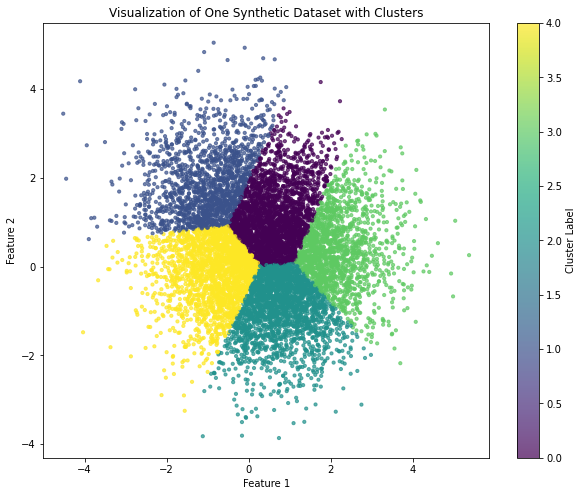

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Function to generate synthetic data with significant overlap
def generate_synthetic_data(centers, num_samples, std_dev=1.0, variation_factor=0.5):
    np.random.seed(None)  # Remove seed to allow random variation
    data = []
    samples_per_cluster = num_samples // len(centers)
    for center in centers:
        # Introduce significant random variation to each center to create overlap
        varied_center = center + np.random.randn(2) * variation_factor
        cluster_data = np.random.randn(samples_per_cluster, 2) * std_dev + varied_center  # Gaussian data around varied centers
        data.append(cluster_data)
    return np.vstack(data)

# Define centers for 5 clusters
centers = np.array([[0.1, 0.1], [-0.1, -0.1], [0.1, -0.1], [-0.1, 0.1], [0, 0]])  # 5 cluster centers
num_samples = 10000  # Each dataset has 10,000 points

# Generate 5 datasets with increased variability and overlap
datasets = []
for i in range(5):
    # Introduce more variability in standard deviation and center variation
    std_dev = 1.0 + 0.5 * np.random.rand()
    variation_factor = 0.5 + 0.5 * np.random.rand()
    dataset = generate_synthetic_data(centers, num_samples, std_dev=std_dev, variation_factor=variation_factor)
    datasets.append(dataset)

# Select one dataset to visualize
selected_dataset = datasets[0]

# Use KMeans to identify clusters for visualization purposes
num_clusters = len(centers)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(selected_dataset)
labels = kmeans.labels_

# Plot the dataset and color points by cluster
plt.figure(figsize=(10, 8))
plt.scatter(selected_dataset[:, 0], selected_dataset[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.title('Visualization of One Synthetic Dataset with Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


2024-11-13 02:34:03,083 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010331.txt
2024-11-13 02:34:03,973 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010407.txt
2024-11-13 02:34:04,928 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010414.txt
2024-11-13 02:34:05,831 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010421.txt
2024-11-13 02:34:06,665 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010428.txt
2024-11-13 02:34:07,547 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010505.txt
2024-11-13 02:34:08,430 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010512.txt
2024-11-13 02:34:09,297 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010519.txt
2024-11-13 02:34:10,162 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010526.txt
2024-11-13 02:34:11,044 - INFO - Computing k-means++ for graph 1
2024-11-13 02:34:11,060 - 

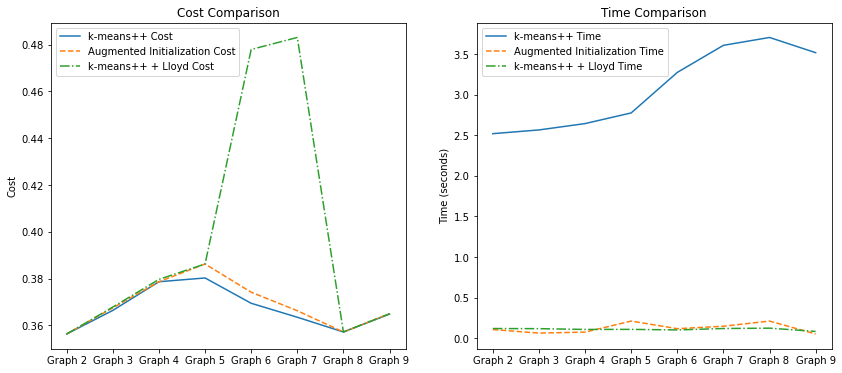

In [2]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def read_graph(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#") or not line.strip():
                continue
            from_node, to_node = map(int, line.split())
            if from_node not in graph:
                graph[from_node] = []
            if to_node not in graph:
                graph[to_node] = []
            graph[from_node].append(to_node)
            graph[to_node].append(from_node)
    return graph

def construct_adjacency_matrix(graph, num_nodes):
    adj_matrix = sp.lil_matrix((num_nodes, num_nodes))
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            adj_matrix[node, neighbor] = 1
            adj_matrix[neighbor, node] = 1
    return adj_matrix

def compute_laplacian(adj_matrix):
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    degrees[degrees == 0] = 1
    D_inv_sqrt = sp.diags(1.0 / np.sqrt(degrees))
    I = sp.eye(adj_matrix.shape[0])
    normalized_laplacian = I - D_inv_sqrt @ adj_matrix @ D_inv_sqrt
    return normalized_laplacian

def get_top_eigenvectors(laplacian, k=2):
    eigenvalues, eigenvectors = spla.eigsh(laplacian, k=k, which='SM')
    return eigenvectors

def compute_embeddings(file_path):
    logging.info(f"Reading graph from {file_path}")
    graph = read_graph(file_path)
    num_nodes = max(graph.keys()) + 1
    adj_matrix = construct_adjacency_matrix(graph, num_nodes)
    laplacian = compute_laplacian(adj_matrix)
    embeddings = get_top_eigenvectors(laplacian, k=2)
    return embeddings

def run_kmeans(embeddings, n_clusters=5, n_runs=20):
    logging.info("Running k-means++ 20 times to find the best initial centers")
    best_kmeans = None
    best_inertia = np.inf
    for i in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=i)
        kmeans.fit(embeddings)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
    return best_kmeans

def plot_embeddings(embeddings, centers, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5, alpha=0.7, c='blue')
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', marker='X')
    plt.title(title)
    plt.xlabel('First Eigenvector')
    plt.ylabel('Second Eigenvector')
    plt.grid(True)
    plt.show()

def compare_kmeans(file_paths, n_clusters=5):
    embeddings_list = [compute_embeddings(fp) for fp in file_paths]
    best_kmeans_results = []

    # Perform k-means++ 20 times on each graph and choose the best
    for i, embeddings in enumerate(embeddings_list):
        logging.info(f"Computing k-means++ for graph {i + 1}")
        start_time = time.time()
        best_kmeans = run_kmeans(embeddings, n_clusters=n_clusters, n_runs=30)
        elapsed_time = time.time() - start_time
        best_kmeans_results.append((best_kmeans, elapsed_time))
        logging.info(f"Best k-means++ run for graph {i + 1} took {elapsed_time:.2f} seconds with cost {best_kmeans.inertia_}")

    # Use the centers from the first graph to initialize Lloyd's algorithm on the other graphs
    initial_centers = best_kmeans_results[0][0].cluster_centers_
    costs_augmented = []
    times_augmented = []

    costs_kmeans_lloyd = []
    times_kmeans_lloyd = []

    for i, (embeddings, (best_kmeans, _)) in enumerate(zip(embeddings_list[1:], best_kmeans_results[1:]), start=2):
        logging.info(f"Running Lloyd's algorithm on graph {i} using centers from graph 1")
        
        # Augmented initialization
        start_time = time.time()
        kmeans_aug = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1, max_iter=300)
        kmeans_aug.fit(embeddings)
        elapsed_time = time.time() - start_time
        costs_augmented.append(kmeans_aug.inertia_)
        times_augmented.append(elapsed_time)
        logging.info(f"Augmented initialization run for graph {i} took {elapsed_time:.2f} seconds with cost {kmeans_aug.inertia_}")

        # Single run of k-means++ + Lloyd
        logging.info(f"Running single k-means++ + Lloyd for graph {i}")
        start_time = time.time()
        kmeans_lloyd = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, max_iter=300)
        kmeans_lloyd.fit(embeddings)
        elapsed_time = time.time() - start_time
        costs_kmeans_lloyd.append(kmeans_lloyd.inertia_)
        times_kmeans_lloyd.append(elapsed_time)
        logging.info(f"k-means++ + Lloyd run for graph {i} took {elapsed_time:.2f} seconds with cost {kmeans_lloyd.inertia_}")

    # Plot results
    x_labels = [f"Graph {i}" for i in range(2, len(file_paths) + 1)]
    normal_costs = [result[0].inertia_ for result in best_kmeans_results[1:]]
    normal_times = [result[1] for result in best_kmeans_results[1:]]

    plt.figure(figsize=(14, 6))

    # Plot cost comparison
    plt.subplot(1, 2, 1)
    plt.plot(x_labels, normal_costs, label='k-means++ Cost')
    plt.plot(x_labels, costs_augmented, label='Augmented Initialization Cost', linestyle='--')
    plt.plot(x_labels, costs_kmeans_lloyd, label='k-means++ + Lloyd Cost', linestyle='-.')
    plt.ylabel('Cost')
    plt.title('Cost Comparison')
    plt.legend()

    # Plot time comparison
    plt.subplot(1, 2, 2)
    plt.plot(x_labels, normal_times, label='k-means++ Time')
    plt.plot(x_labels, times_augmented, label='Augmented Initialization Time', linestyle='--')
    plt.plot(x_labels, times_kmeans_lloyd, label='k-means++ + Lloyd Time', linestyle='-.')
    plt.ylabel('Time (seconds)')
    plt.title('Time Comparison')
    plt.legend()

    plt.show()

# Example usage
file_paths = [
    r'C:/Users/maria/Desktop/oregon/oregon2_010331.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010407.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010414.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010421.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010428.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010505.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010512.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010519.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010526.txt'
]

# Compare the k-means results
compare_kmeans(file_paths, n_clusters=5)


2024-11-13 02:44:00,054 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010331.txt
2024-11-13 02:44:01,024 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010407.txt
2024-11-13 02:44:01,987 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010414.txt
2024-11-13 02:44:02,883 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010421.txt
2024-11-13 02:44:03,751 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010428.txt
2024-11-13 02:44:04,632 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010505.txt
2024-11-13 02:44:05,443 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010512.txt
2024-11-13 02:44:06,464 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010519.txt
2024-11-13 02:44:07,475 - INFO - Reading graph from C:/Users/maria/Desktop/oregon/oregon2_010526.txt
2024-11-13 02:44:08,533 - INFO - Computing k-means++ for graph 1
2024-11-13 02:44:08,533 - 

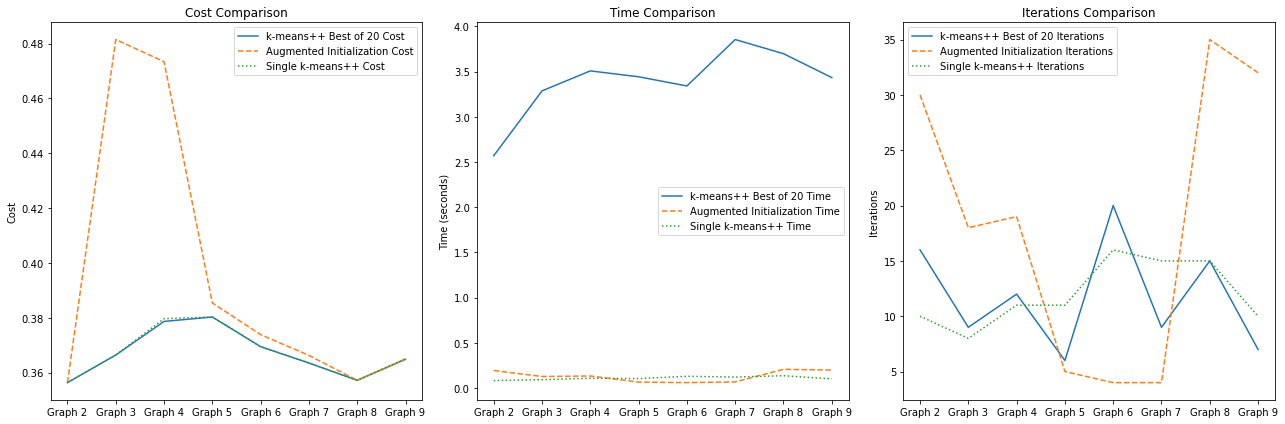

In [7]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def read_graph(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#") or not line.strip():
                continue
            from_node, to_node = map(int, line.split())
            if from_node not in graph:
                graph[from_node] = []
            if to_node not in graph:
                graph[to_node] = []
            graph[from_node].append(to_node)
            graph[to_node].append(from_node)
    return graph

def construct_adjacency_matrix(graph, num_nodes):
    adj_matrix = sp.lil_matrix((num_nodes, num_nodes))
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            adj_matrix[node, neighbor] = 1
            adj_matrix[neighbor, node] = 1
    return adj_matrix

def compute_laplacian(adj_matrix):
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    degrees[degrees == 0] = 1
    D_inv_sqrt = sp.diags(1.0 / np.sqrt(degrees))
    I = sp.eye(adj_matrix.shape[0])
    normalized_laplacian = I - D_inv_sqrt @ adj_matrix @ D_inv_sqrt
    return normalized_laplacian

def get_top_eigenvectors(laplacian, k=2):
    eigenvalues, eigenvectors = spla.eigsh(laplacian, k=k, which='SM')
    return eigenvectors

def compute_embeddings(file_path):
    logging.info(f"Reading graph from {file_path}")
    graph = read_graph(file_path)
    num_nodes = max(graph.keys()) + 1
    adj_matrix = construct_adjacency_matrix(graph, num_nodes)
    laplacian = compute_laplacian(adj_matrix)
    embeddings = get_top_eigenvectors(laplacian, k=2)
    return embeddings

def run_kmeans(embeddings, n_clusters=5, n_runs=20):
    logging.info("Running k-means++ 20 times to find the best initial centers")
    best_kmeans = None
    best_inertia = np.inf
    best_iterations = 0
    for i in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, max_iter=300, random_state=i)
        kmeans.fit(embeddings)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
            best_iterations = kmeans.n_iter_
    return best_kmeans, best_iterations

def run_single_kmeans(embeddings, n_clusters=5):
    logging.info("Running k-means++ a single time")
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, max_iter=300)
    kmeans.fit(embeddings)
    return kmeans, kmeans.n_iter_

def compare_kmeans(file_paths, n_clusters=5):
    embeddings_list = [compute_embeddings(fp) for fp in file_paths]
    best_kmeans_results = []
    single_kmeans_results = []

    # Perform k-means++ 20 times on each graph and choose the best
    for i, embeddings in enumerate(embeddings_list):
        logging.info(f"Computing k-means++ for graph {i + 1}")
        
        # Best of 20 runs
        start_time = time.time()
        best_kmeans, best_iterations = run_kmeans(embeddings, n_clusters=n_clusters, n_runs=30)
        elapsed_time = time.time() - start_time
        best_kmeans_results.append((best_kmeans, best_iterations, elapsed_time))

        # Single k-means++ run
        start_time = time.time()
        single_kmeans, single_iterations = run_single_kmeans(embeddings, n_clusters=n_clusters)
        single_elapsed_time = time.time() - start_time
        single_kmeans_results.append((single_kmeans, single_iterations, single_elapsed_time))

    # Use the centers from the first graph to initialize Lloyd's algorithm on the other graphs
    initial_centers = best_kmeans_results[0][0].cluster_centers_
    costs_augmented = []
    times_augmented = []
    iterations_augmented = []

    for i, (embeddings, (best_kmeans, _, _)) in enumerate(zip(embeddings_list[1:], best_kmeans_results[1:]), start=2):
        logging.info(f"Running Lloyd's algorithm on graph {i} using centers from graph 1")
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1, max_iter=300)
        kmeans.fit(embeddings)
        elapsed_time = time.time() - start_time
        costs_augmented.append(kmeans.inertia_)
        times_augmented.append(elapsed_time)
        iterations_augmented.append(kmeans.n_iter_)

    # Plot results
    x_labels = [f"Graph {i}" for i in range(2, len(file_paths) + 1)]
    normal_costs = [result[0].inertia_ for result in best_kmeans_results[1:]]
    single_costs = [result[0].inertia_ for result in single_kmeans_results[1:]]
    normal_times = [result[2] for result in best_kmeans_results[1:]]
    single_times = [result[2] for result in single_kmeans_results[1:]]
    normal_iterations = [result[1] for result in best_kmeans_results[1:]]
    single_iterations = [result[1] for result in single_kmeans_results[1:]]

    plt.figure(figsize=(18, 6))

    # Plot cost comparison
    plt.subplot(1, 3, 1)
    plt.plot(x_labels, normal_costs, label='k-means++ Best of 20 Cost')
    plt.plot(x_labels, costs_augmented, label='Augmented Initialization Cost', linestyle='--')
    plt.plot(x_labels, single_costs, label='Single k-means++ Cost', linestyle=':')
    plt.ylabel('Cost')
    plt.title('Cost Comparison')
    plt.legend()

    # Plot time comparison
    plt.subplot(1, 3, 2)
    plt.plot(x_labels, normal_times, label='k-means++ Best of 20 Time')
    plt.plot(x_labels, times_augmented, label='Augmented Initialization Time', linestyle='--')
    plt.plot(x_labels, single_times, label='Single k-means++ Time', linestyle=':')
    plt.ylabel('Time (seconds)')
    plt.title('Time Comparison')
    plt.legend()

    # Plot iteration comparison
    plt.subplot(1, 3, 3)
    plt.plot(x_labels, normal_iterations, label='k-means++ Best of 20 Iterations')
    plt.plot(x_labels, iterations_augmented, label='Augmented Initialization Iterations', linestyle='--')
    plt.plot(x_labels, single_iterations, label='Single k-means++ Iterations', linestyle=':')
    plt.ylabel('Iterations')
    plt.title('Iterations Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
file_paths = [
    r'C:/Users/maria/Desktop/oregon/oregon2_010331.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010407.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010414.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010421.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010428.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010505.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010512.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010519.txt',
    r'C:/Users/maria/Desktop/oregon/oregon2_010526.txt'
]

# Compare the k-means results
compare_kmeans(file_paths, n_clusters=5)


Computing best centroids for the first dataset with K-means++ (Best of 20 runs)...
K-means++ run 1: Cost = 10631.01
K-means++ run 2: Cost = 10661.41
K-means++ run 3: Cost = 10757.24
K-means++ run 4: Cost = 10774.62
K-means++ run 5: Cost = 10733.71
K-means++ run 6: Cost = 10733.71
K-means++ run 7: Cost = 10629.48
K-means++ run 8: Cost = 10731.63
K-means++ run 9: Cost = 10757.17
K-means++ run 10: Cost = 10752.40
K-means++ run 11: Cost = 10757.37
K-means++ run 12: Cost = 10833.84
K-means++ run 13: Cost = 10727.17
K-means++ run 14: Cost = 10628.93
K-means++ run 15: Cost = 10774.68
K-means++ run 16: Cost = 10628.38
K-means++ run 17: Cost = 10630.57
K-means++ run 18: Cost = 10734.06
K-means++ run 19: Cost = 10628.66
K-means++ run 20: Cost = 10757.15

Processing dataset 1 with 10000 points...
Cost with initialized centroids: 10627.85, Time: 0.0070 seconds
Computing k-means++ without initialized centroids (Best of 20 runs)...
Cost without initialized centroids: 10629.76, Time: 0.7139 seconds
C

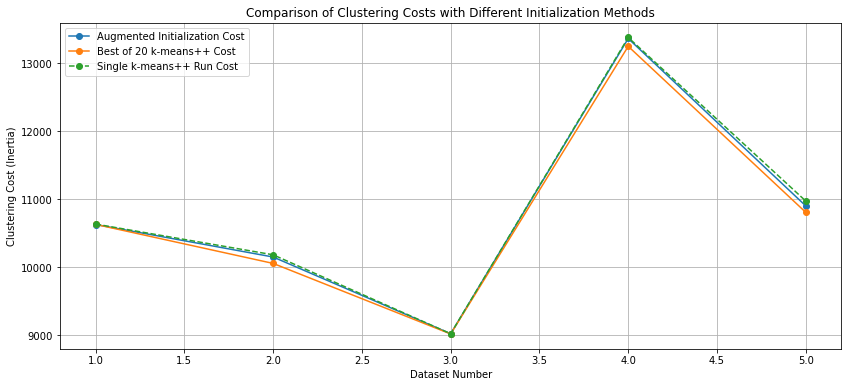

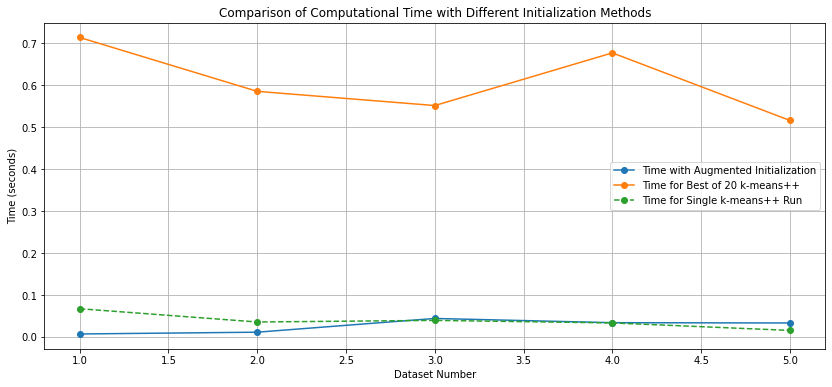

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Function to generate synthetic data with significant overlap
def generate_synthetic_data(centers, num_samples, std_dev=1.0, variation_factor=0.5):
    np.random.seed(None)  # Remove seed to allow random variation
    data = []
    samples_per_cluster = num_samples // len(centers)
    for center in centers:
        # Introduce significant random variation to each center to create overlap
        varied_center = center + np.random.randn(2) * variation_factor
        cluster_data = np.random.randn(samples_per_cluster, 2) * std_dev + varied_center  # Gaussian data around varied centers
        data.append(cluster_data)
    return np.vstack(data)

# Define centers for 5 clusters
centers = np.array([[0.1, 0.1], [-0.1, -0.1], [0.1, -0.1], [-0.1, 0.1], [0, 0]])  # 5 cluster centers
num_samples = 10000  # Each dataset has 10,000 points

# Generate 5 datasets with increased variability and overlap
datasets = []
for i in range(5):
    # Introduce more variability in standard deviation and center variation
    std_dev = 1.0 + 0.5 * np.random.rand()
    variation_factor = 0.5 + 0.5 * np.random.rand()
    dataset = generate_synthetic_data(centers, num_samples, std_dev=std_dev, variation_factor=variation_factor)
    datasets.append(dataset)

# Function to compute the best k-means++ centroids
def compute_best_kmeans_centroids(data, num_clusters=5, num_runs=20):
    best_kmeans = None
    best_cost = float('inf')
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
        kmeans.fit(data)
        cost = kmeans.inertia_  # Clustering cost
        if cost < best_cost:
            best_cost = cost
            best_kmeans = kmeans
        print(f"K-means++ run {i+1}: Cost = {cost:.2f}")
    return best_kmeans.cluster_centers_, best_cost

# Function to perform a single k-means++ run
def single_kmeans_run(data, num_clusters=5):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    return cost, elapsed_time

# Compute the best centroids for the first dataset
print("Computing best centroids for the first dataset with K-means++ (Best of 20 runs)...")
initial_centroids, initial_cost = compute_best_kmeans_centroids(datasets[0])

# Function to perform Lloyd's algorithm with specified initial centroids
def lloyds_algorithm_with_initialization(data, initial_centroids):
    kmeans = KMeans(n_clusters=len(initial_centroids), init=initial_centroids, n_init=1, max_iter=500)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    return cost, elapsed_time

# Perform clustering comparisons on all datasets
costs_with_init = []
costs_without_init = []
costs_single_run = []
times_with_init = []
times_without_init = []
times_single_run = []

for i, data in enumerate(datasets):
    print(f"\nProcessing dataset {i+1} with {len(data)} points...")

    # Clustering with initialized centroids
    cost_with_init, time_with_init = lloyds_algorithm_with_initialization(data, initial_centroids)
    costs_with_init.append(cost_with_init)
    times_with_init.append(time_with_init)
    print(f"Cost with initialized centroids: {cost_with_init:.2f}, Time: {time_with_init:.4f} seconds")

    # Clustering without initialization (Best of 20 k-means++)
    print("Computing k-means++ without initialized centroids (Best of 20 runs)...")
    start_time = time.time()
    kmeans_standard = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=20)
    kmeans_standard.fit(data)
    time_without_init = time.time() - start_time
    cost_without_init = kmeans_standard.inertia_
    costs_without_init.append(cost_without_init)
    times_without_init.append(time_without_init)
    print(f"Cost without initialized centroids: {cost_without_init:.2f}, Time: {time_without_init:.4f} seconds")

    # Single k-means++ run
    print("Computing single k-means++ run...")
    cost_single_run, time_single_run = single_kmeans_run(data, num_clusters=len(initial_centroids))
    costs_single_run.append(cost_single_run)
    times_single_run.append(time_single_run)
    print(f"Cost for single k-means++ run: {cost_single_run:.2f}, Time: {time_single_run:.4f} seconds")

# Plot of clustering costs
plt.figure(figsize=(14, 6))
plt.plot(range(1, 6), costs_with_init, label='Augmented Initialization Cost', marker='o', linestyle='-')
plt.plot(range(1, 6), costs_without_init, label='Best of 20 k-means++ Cost', marker='o', linestyle='-')
plt.plot(range(1, 6), costs_single_run, label='Single k-means++ Run Cost', marker='o', linestyle='--')
plt.title('Comparison of Clustering Costs with Different Initialization Methods')
plt.xlabel('Dataset Number')
plt.ylabel('Clustering Cost (Inertia)')
plt.legend()
plt.grid(True)
plt.show()

# Plot of computational times
plt.figure(figsize=(14, 6))
plt.plot(range(1, 6), times_with_init, label='Time with Augmented Initialization', marker='o', linestyle='-')
plt.plot(range(1, 6), times_without_init, label='Time for Best of 20 k-means++', marker='o', linestyle='-')
plt.plot(range(1, 6), times_single_run, label='Time for Single k-means++ Run', marker='o', linestyle='--')
plt.title('Comparison of Computational Time with Different Initialization Methods')
plt.xlabel('Dataset Number')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


Computing best centroids for the first dataset with K-means++...
K-means++ run 1: Cost = 24534.45
K-means++ run 2: Cost = 24547.60
K-means++ run 3: Cost = 24604.89
K-means++ run 4: Cost = 24604.98
K-means++ run 5: Cost = 24537.27
K-means++ run 6: Cost = 24552.44
K-means++ run 7: Cost = 24610.74
K-means++ run 8: Cost = 24526.33
K-means++ run 9: Cost = 24612.12
K-means++ run 10: Cost = 24529.67
K-means++ run 11: Cost = 24537.33
K-means++ run 12: Cost = 24552.63
K-means++ run 13: Cost = 24607.28
K-means++ run 14: Cost = 24530.62
K-means++ run 15: Cost = 24537.41
K-means++ run 16: Cost = 24604.99
K-means++ run 17: Cost = 26512.53
K-means++ run 18: Cost = 24526.52
K-means++ run 19: Cost = 24607.19
K-means++ run 20: Cost = 24610.15

Processing dataset 1 with 50000 points...
Cost with initialized centroids: 24524.95, Time: 0.0234 seconds, Iterations: 1
Computing K-means++ without initialized centroids (Best of 20 runs)...
Cost without initialized centroids: 24525.83, Time: 1.5983 seconds, Ite

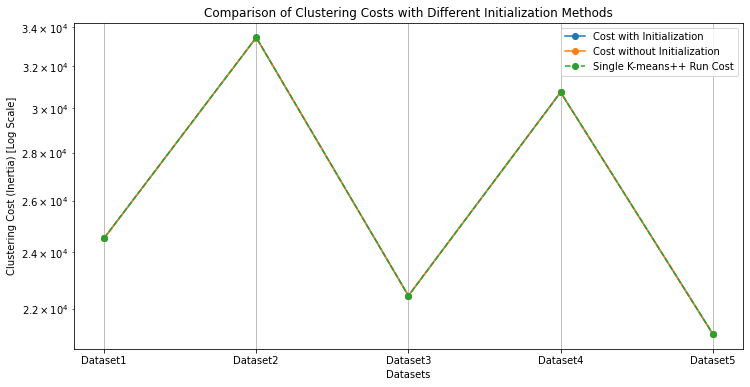

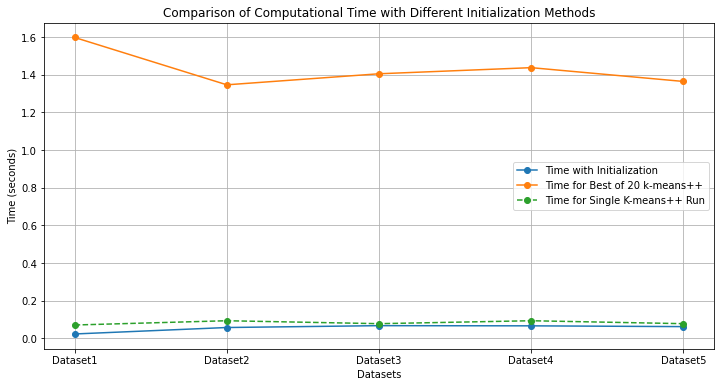

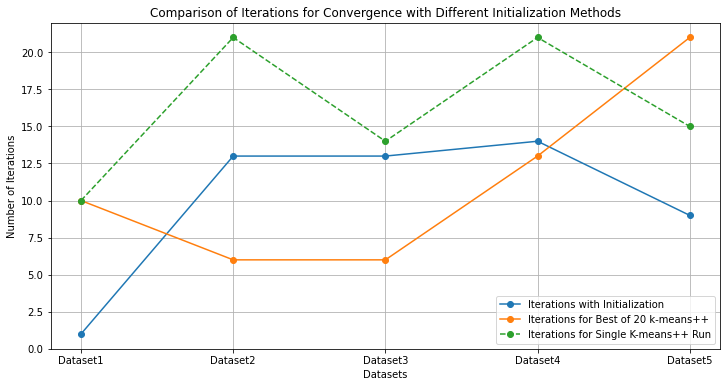

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Function to generate synthetic data with variability
def generate_synthetic_data(centers, num_samples, std_dev=0.5, variation_factor=0.1):
    np.random.seed(None)  # Remove seed to allow random variation
    data = []
    samples_per_cluster = num_samples // len(centers)
    for center in centers:
        # Introduce significant random variation to each center to create variability
        varied_center = center + np.random.randn(2) * variation_factor
        cluster_data = np.random.randn(samples_per_cluster, 2) * std_dev + varied_center  # Gaussian data around varied centers
        data.append(cluster_data)
    return np.vstack(data)

# Define centers for 5 clusters
centers = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])  # 5 cluster centers
num_samples = 50000  # Each dataset has 50,000 points

# Generate 5 datasets with increased variability
datasets = []
for i in range(5):
    # Introduce more variability in standard deviation and center variation
    std_dev = 0.5 + 0.3 * np.random.rand()
    variation_factor = 0.2 + 0.2 * np.random.rand()
    dataset = generate_synthetic_data(centers, num_samples, std_dev=std_dev, variation_factor=variation_factor)
    datasets.append(dataset)

# Function to compute the best k-means++ centroids
def compute_best_kmeans_centroids(data, num_clusters=5, num_runs=20):
    best_kmeans = None
    best_cost = float('inf')
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
        kmeans.fit(data)
        cost = kmeans.inertia_  # Clustering cost
        if cost < best_cost:
            best_cost = cost
            best_kmeans = kmeans
        print(f"K-means++ run {i+1}: Cost = {cost:.2f}")
    return best_kmeans.cluster_centers_, best_cost

# Function to perform a single k-means++ run
def single_kmeans_run(data, num_clusters=5):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    return cost, elapsed_time, kmeans.n_iter_

# Compute the best centroids for the first dataset
print("Computing best centroids for the first dataset with K-means++...")
initial_centroids, initial_cost = compute_best_kmeans_centroids(datasets[0])

# Function to perform Lloyd's algorithm with specified initial centroids
def lloyds_algorithm_with_initialization(data, initial_centroids):
    kmeans = KMeans(n_clusters=len(initial_centroids), init=initial_centroids, n_init=1, max_iter=500)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    n_iter = kmeans.n_iter_  # Number of iterations for convergence
    return cost, elapsed_time, n_iter

# Perform clustering comparisons on all datasets
costs_with_init = []
costs_without_init = []
costs_single_run = []
times_with_init = []
times_without_init = []
times_single_run = []
iterations_with_init = []
iterations_without_init = []
iterations_single_run = []

for i, data in enumerate(datasets):
    print(f"\nProcessing dataset {i+1} with {len(data)} points...")

    # Clustering with initialized centroids
    cost_with_init, time_with_init, n_iter_with_init = lloyds_algorithm_with_initialization(data, initial_centroids)
    costs_with_init.append(cost_with_init)
    times_with_init.append(time_with_init)
    iterations_with_init.append(n_iter_with_init)
    print(f"Cost with initialized centroids: {cost_with_init:.2f}, Time: {time_with_init:.4f} seconds, Iterations: {n_iter_with_init}")

    # Clustering without initialization (Best of 20 k-means++)
    print("Computing K-means++ without initialized centroids (Best of 20 runs)...")
    start_time = time.time()
    kmeans_standard = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=20)
    kmeans_standard.fit(data)
    time_without_init = time.time() - start_time
    cost_without_init = kmeans_standard.inertia_
    n_iter_without_init = kmeans_standard.n_iter_  # Number of iterations for convergence
    costs_without_init.append(cost_without_init)
    times_without_init.append(time_without_init)
    iterations_without_init.append(n_iter_without_init)
    print(f"Cost without initialized centroids: {cost_without_init:.2f}, Time: {time_without_init:.4f} seconds, Iterations: {n_iter_without_init}")

    # Single k-means++ run
    print("Computing single k-means++ run...")
    cost_single_run, time_single_run, n_iter_single_run = single_kmeans_run(data, num_clusters=len(initial_centroids))
    costs_single_run.append(cost_single_run)
    times_single_run.append(time_single_run)
    iterations_single_run.append(n_iter_single_run)
    print(f"Cost for single k-means++ run: {cost_single_run:.2f}, Time: {time_single_run:.4f} seconds, Iterations: {n_iter_single_run}")

# Dataset labels
dataset_labels = [f'Dataset{i+1}' for i in range(5)]

# Plot of clustering costs with logarithmic scale
plt.figure(figsize=(12, 6))
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.plot(dataset_labels, costs_with_init, label='Cost with Initialization', marker='o', linestyle='-')
plt.plot(dataset_labels, costs_without_init, label='Cost without Initialization', marker='o', linestyle='-')
plt.plot(dataset_labels, costs_single_run, label='Single K-means++ Run Cost', marker='o', linestyle='--')
plt.title('Comparison of Clustering Costs with Different Initialization Methods')
plt.xlabel('Datasets')
plt.ylabel('Clustering Cost (Inertia) [Log Scale]')
plt.legend()
plt.grid(True)
plt.show()

# Plot of computational times with larger markers
plt.figure(figsize=(12, 6))
plt.plot(dataset_labels, times_with_init, label='Time with Initialization', marker='o', linestyle='-')
plt.plot(dataset_labels, times_without_init, label='Time for Best of 20 k-means++', marker='o', linestyle='-')
plt.plot(dataset_labels, times_single_run, label='Time for Single K-means++ Run', marker='o', linestyle='--')
plt.title('Comparison of Computational Time with Different Initialization Methods')
plt.xlabel('Datasets')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Plot of iterations needed for convergence
plt.figure(figsize=(12, 6))
plt.plot(dataset_labels, iterations_with_init, label='Iterations with Initialization', marker='o', linestyle='-')
plt.plot(dataset_labels, iterations_without_init, label='Iterations for Best of 20 k-means++', marker='o', linestyle='-')
plt.plot(dataset_labels, iterations_single_run, label='Iterations for Single K-means++ Run', marker='o', linestyle='--')
plt.title('Comparison of Iterations for Convergence with Different Initialization Methods')
plt.xlabel('Datasets')
plt.ylabel('Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (291330824.py, line 42)

Data contains NaN or infinity values. Cleaning the data...
Computing best centroids for the first dataset with K-means++...
K-means++ run 1: Cost = 91111517780.86
K-means++ run 2: Cost = 92596016047.36
K-means++ run 3: Cost = 92169805145.97
K-means++ run 4: Cost = 91967631803.86
K-means++ run 5: Cost = 92419792344.52
K-means++ run 6: Cost = 92763815188.75
K-means++ run 7: Cost = 92290891409.49
K-means++ run 8: Cost = 91137957996.70
K-means++ run 9: Cost = 92271496803.14
K-means++ run 10: Cost = 92290891409.49
K-means++ run 11: Cost = 92220530135.74
K-means++ run 12: Cost = 92708034985.16
K-means++ run 13: Cost = 91968895637.00
K-means++ run 14: Cost = 93540981358.38
K-means++ run 15: Cost = 92530084002.55
K-means++ run 16: Cost = 92084466095.89
K-means++ run 17: Cost = 91969994750.71
K-means++ run 18: Cost = 91967803756.45
K-means++ run 19: Cost = 92595933910.96
K-means++ run 20: Cost = 91111739359.10

Processing second dataset...
Cost with initialized centroids: 89640618472.60, Time: 

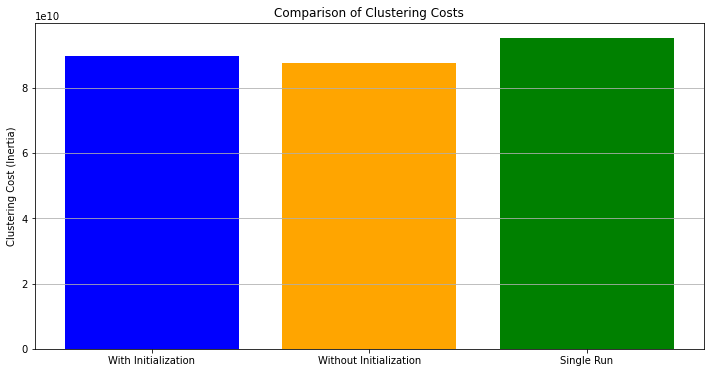

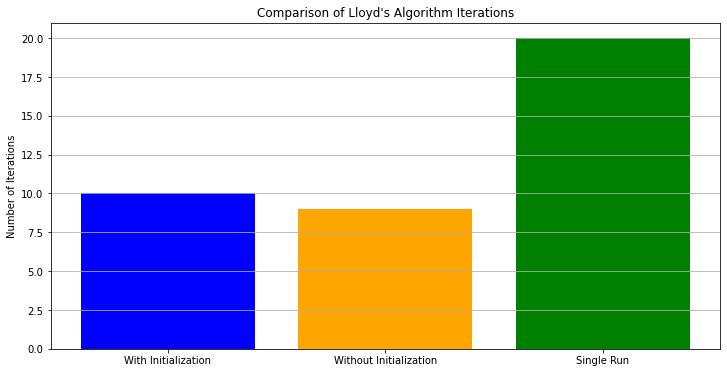

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Load the CSV file into a pandas DataFrame
file_path = r'C:/Users/maria/Desktop/Customer_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract features for clustering (remove non-numeric columns like 'CUST_ID')
features = data.iloc[:, 1:].values  # Assuming the first column is 'CUST_ID'

# Check for NaN or infinite values
if np.isnan(features).any() or np.isinf(features).any():
    print("Data contains NaN or infinity values. Cleaning the data...")
    
    # Handle NaN values: fill them with the column mean or drop them
    df_features = pd.DataFrame(features)
    df_features = df_features.fillna(df_features.mean())  # Fill NaNs with column mean
    features = df_features.values
    
    # Handle infinite values: replace them with a large finite number
    features[np.isinf(features)] = np.finfo(np.float64).max

# Split the data into two random subsets
np.random.seed(42)  # For reproducibility
np.random.shuffle(features)

# Split into two equal parts
split_index = len(features) // 2
data1 = features[:split_index]
data2 = features[split_index:]

# Function to compute the best k-means++ centroids
def compute_best_kmeans_centroids(data, num_clusters=5, num_runs=20):
    best_kmeans = None
    best_cost = float('inf')
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)
        kmeans.fit(data)
        cost = kmeans.inertia_  # Clustering cost
        if cost < best_cost:
            best_cost = cost
            best_kmeans = kmeans
        print(f"K-means++ run {i+1}: Cost = {cost:.2f}")
    return best_kmeans.cluster_centers_, best_cost

# Compute the best centroids for the first dataset
print("Computing best centroids for the first dataset with K-means++...")
initial_centroids, initial_cost = compute_best_kmeans_centroids(data1)

# Function to perform Lloyd's algorithm with specified initial centroids
def lloyds_algorithm_with_initialization(data, initial_centroids):
    kmeans = KMeans(n_clusters=len(initial_centroids), init=initial_centroids, n_init=1, max_iter=500)
    start_time = time.time()
    kmeans.fit(data)
    elapsed_time = time.time() - start_time
    cost = kmeans.inertia_
    n_iter = kmeans.n_iter_  # Number of iterations for convergence
    return cost, elapsed_time, n_iter

# Perform Lloyd's algorithm on the second dataset with initialization from the best centroids of the first dataset
print("\nProcessing second dataset...")
cost_with_init, time_with_init, n_iter_with_init = lloyds_algorithm_with_initialization(data2, initial_centroids)
print(f"Cost with initialized centroids: {cost_with_init:.2f}, Time: {time_with_init:.4f} seconds, Iterations: {n_iter_with_init}")

# Perform K-means++ on the second dataset without initialized centroids
print("Computing K-means++ without initialized centroids on the second dataset...")
start_time = time.time()
kmeans_standard = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=20)
kmeans_standard.fit(data2)
time_without_init = time.time() - start_time
cost_without_init = kmeans_standard.inertia_
n_iter_without_init = kmeans_standard.n_iter_  # Number of iterations for convergence
print(f"Cost without initialized centroids: {cost_without_init:.2f}, Time: {time_without_init:.4f} seconds, Iterations: {n_iter_without_init}")

# Perform a single run of K-means++ on the second dataset
print("Computing a single K-means++ run on the second dataset...")
single_run_kmeans = KMeans(n_clusters=len(initial_centroids), init='k-means++', n_init=1)
start_time = time.time()
single_run_kmeans.fit(data2)
time_single_run = time.time() - start_time
cost_single_run = single_run_kmeans.inertia_
n_iter_single_run = single_run_kmeans.n_iter_
print(f"Single K-means++ run cost: {cost_single_run:.2f}, Time: {time_single_run:.4f} seconds, Iterations: {n_iter_single_run}")

# Plot and compare clustering costs
plt.figure(figsize=(12, 6))
x_labels = ['Learning augmented', 'best of 20 k-means++', 'Single Run k-means++']
costs = [cost_with_init, cost_without_init, cost_single_run]

plt.bar(x_labels, costs, color=['blue', 'orange', 'green'])
plt.title('Comparison of Clustering Costs')
plt.ylabel('Clustering Cost (Inertia)')
plt.grid(axis='y')
plt.show()

# Plot and compare the number of Lloyd's iterations
plt.figure(figsize=(12, 6))
iterations = [n_iter_with_init, n_iter_without_init, n_iter_single_run]

plt.bar(x_labels, iterations, color=['blue', 'orange', 'green'])
plt.title('Comparison of Lloyd\'s Algorithm Iterations')
plt.ylabel('Number of Iterations')
plt.grid(axis='y')
plt.show()


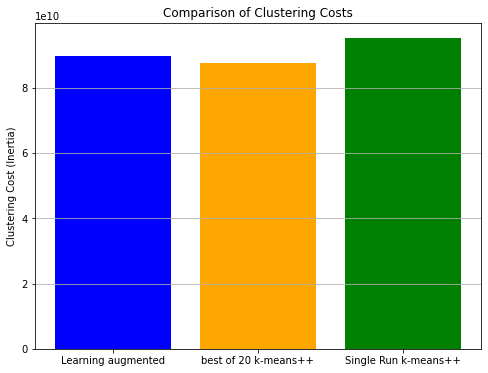

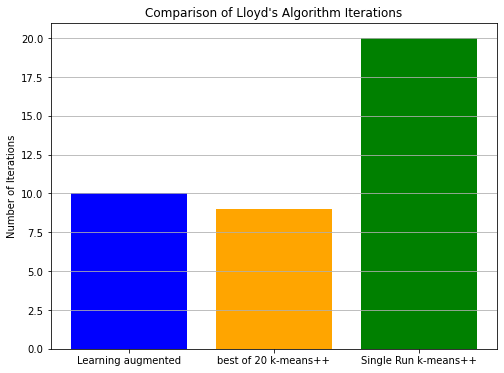

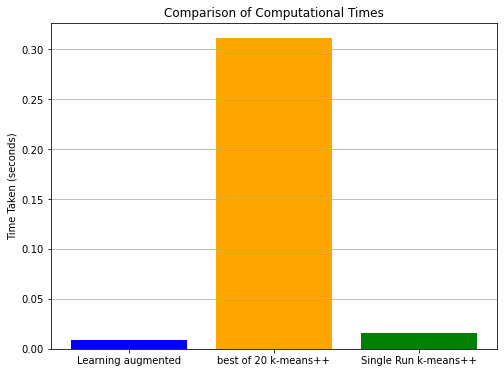

In [5]:
# Plot and compare clustering costs
plt.figure(figsize=(8, 6))
x_labels = ['Learning augmented', 'best of 20 k-means++', 'Single Run k-means++']
costs = [cost_with_init, cost_without_init, cost_single_run]

plt.bar(x_labels, costs, color=['blue', 'orange', 'green'])
plt.title('Comparison of Clustering Costs')
plt.ylabel('Clustering Cost (Inertia)')
plt.grid(axis='y')
plt.show()

# Plot and compare the number of Lloyd's iterations
plt.figure(figsize=(8, 6))
iterations = [n_iter_with_init, n_iter_without_init, n_iter_single_run]

plt.bar(x_labels, iterations, color=['blue', 'orange', 'green'])
plt.title('Comparison of Lloyd\'s Algorithm Iterations')
plt.ylabel('Number of Iterations')
plt.grid(axis='y')
plt.show()

# Plot and compare computational times
plt.figure(figsize=(8, 6))
times = [time_with_init, time_without_init, time_single_run]

plt.bar(x_labels, times, color=['blue', 'orange', 'green'])
plt.title('Comparison of Computational Times')
plt.ylabel('Time Taken (seconds)')
plt.grid(axis='y')
plt.show()
